# Proyecto 03 - Series de Tiempo

## Repositorio GitHub
*Podés acceder a este notebook alojado en el respositorio de Git [aquí](https://github.com/Bargibay/Acamica_P3.git)*

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib

In [2]:
import seaborn as sns

In [3]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [6]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

In [13]:
dataset.head()

periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos              fecha2  
0       Liviano  NO COBRADO              22 2019-01-01 01:00:00  
1       Liviano    TELEPASE               6 2019-01-01 01:00:00  
2       Liviano  NO COBRADO              53 2019-01-01 01:00:00  
3       Liviano    TELEPASE              18 2019-01-01 01:00:00  
4       Liviano    EFECTIVO              16 2019-01-01 01:00:00

Inicialmente vamos a crearnos una serie de tablas resampleadas a semanal y diario.

In [14]:
#Realizamos el resampleo semanal sumando la cantidad de vehículos
semanal = dataset.resample('W', on = 'fecha2').sum()
semanal.head()

periodo  hora_inicio  hora_fin  cantidad_pasos
fecha2                                                     
2017-01-01   5349084        34000     33484          220443
2017-01-08  52986590       313556    316594         2260596
2017-01-15  53160052       313207    316955         2314268
2017-01-22  53769186       317068    320206         2257919
2017-01-29  54039464       318521    322057         2282364

La primer pregunta que nos hacemos es cómo es el comportamiento de los diferentes puestos de peaje, en cuatno a volúmen de vehículos que ingresan (sendito capital) o egresan (sentido provincia) por cada uno.  Realizaremos solo un grafico de los totales para todos los años observados.

In [15]:
totales_peajes = dataset.groupby(['estacion', 'sentido']).sum().reset_index()
totales_peajes

estacion    sentido    periodo  hora_inicio  hora_fin  \
0              Alberdi     Centro  286226545      1764796   1799532   
1              Alberdi  Provincia  326328032      1997034   2027262   
2              Alberti     Centro  125295102       771411    786933   
3              Alberti  Provincia  141776199       866734    876187   
4           Avellaneda     Centro  968096548      5666382   5708978   
5           Avellaneda  Provincia  994517861      5907135   5961699   
6           Dellepiane     Centro  189670917      1098957   1103788   
7           Dellepiane  Provincia  189093483      1101960   1105401   
8    Dellepiane Centro     Centro  720013790      4178179   4227144   
9   Dellepiane Liniers  Provincia  713549256      4208052   4242628   
10               Illia     Centro  796678390      4682099   4718869   
11               Illia  Provincia  721840779      4276974   4321236   
12                 PDB     Centro   41363253       236052    235995   
13                 PDB  Provincia   41343063       236057    236014   
14              Retiro  Provincia  620511895      3731041   3783713   
15            Salguero  Provincia  153991032       922654    932578   
16           Sarmiento  Provincia  154648071       916055    926497   

    cantidad_pasos  
0          4652887  
1          6871469  
2          2271801  
3          3359600  
4         73792441  
5         74975143  
6         15007103  
7         14288345  
8         31288199  
9         29168579  
10        53205717  
11        49010072  
12         2883522  
13         2784854  
14         4921960  
15         2790263  
16         3365752

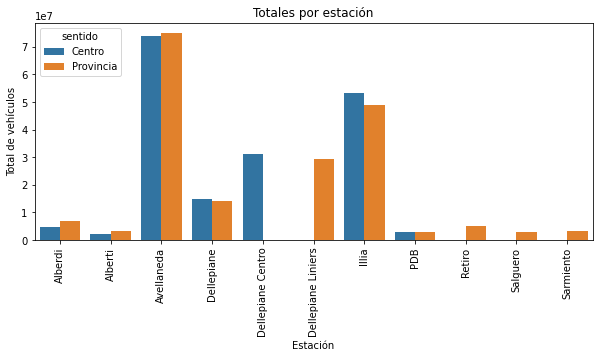

In [16]:
#Graficamos la cantidad de vehículos registrados en cada uno de los peajes de ingreso y egreso.
plt.figure(figsize = (10,4))
sns.barplot(data = totales_peajes, x = 'estacion', y = 'cantidad_pasos', hue = 'sentido')
plt.xticks()
plt.xticks(rotation = 90)
plt.title('Totales por estación')
plt.xlabel('Estación')
plt.ylabel('Total de vehículos')
plt.show()

La segunda pregunta que nos hacemos es cómo evolucinoan los diferentes medios de pago a lo largo de los años.  Para ello graficaremos la cantidad de vehículos que a diario ingresan o egresan utilizando cada medio de pago.

In [17]:
#Realizamos el reampleo diario sumando también la cantidad de vehículos.  Mantenemos el medio de pago.
diario = dataset.groupby(['fecha', 'forma_pago']).sum().reset_index()
diario.head()

fecha  forma_pago  periodo  hora_inicio  hora_fin  cantidad_pasos
0  2017-01-01    EFECTIVO  1857657        12107     11900          157472
1  2017-01-01      EXENTO   732171         4492      4447            1638
2  2017-01-01  INFRACCION   387264         2507      2459             670
3  2017-01-01    MONEDERO     2017           17        18               1
4  2017-01-01  NO COBRADO   490131         2826      2829            5756

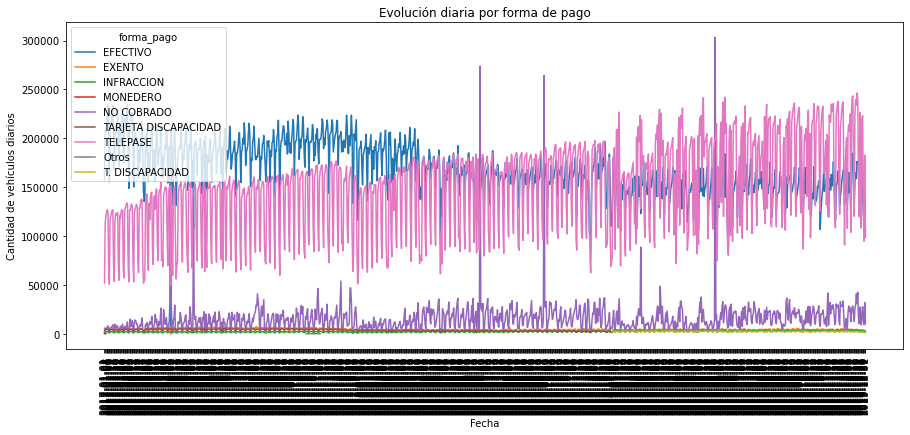

In [18]:
#graficamos la evolución diaria según el medio de pago.
plt.figure(figsize = (15,6))
sns.lineplot(data = diario, x = 'fecha', y = 'cantidad_pasos', hue = 'forma_pago')
plt.xticks(rotation = 90)
plt.title('Evolución diaria por forma de pago')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehículos diarios')
plt.axis()
plt.show()

Luego, realizamos el mismo análisis pero para el caso de la autopista Illia.  Observaremos la evolución de las diferentes formas de pago para esa estación.

In [19]:
diario_illia = dataset[dataset.estacion == 'Illia'].groupby(['fecha', 'forma_pago']).sum().reset_index()

<AxesSubplot:xlabel='fecha', ylabel='cantidad_pasos'>

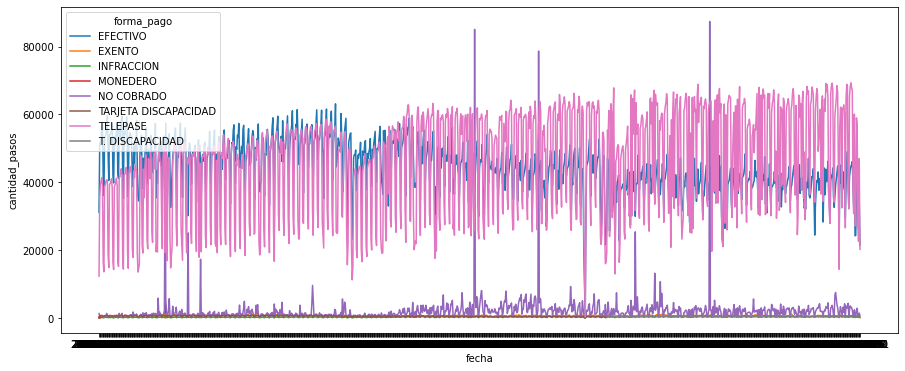

In [20]:
plt.figure(figsize = (15,6))
sns.lineplot(data = diario_illia, x = 'fecha', y = 'cantidad_pasos', hue = 'forma_pago')

Vamos a continuar trabajando con la estación **Illia** y la forma de pago **Efectivo**
Para ello filtraremos el dataset original quedándonos con los datos que respondan a estas condiciones.


In [21]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos  \
80   2019-01-01         2  Martes     Centro       Liviano             537   
86   2019-01-01         2  Martes     Centro        Pesado               1   
88   2019-01-01         2  Martes  Provincia       Liviano             443   
94   2019-01-01         2  Martes  Provincia        Pesado               1   
149  2019-01-01         3  Martes     Centro       Liviano             769   

                 fecha2  
80  2019-01-01 02:00:00  
86  2019-01-01 02:00:00  
88  2019-01-01 02:00:00  
94  2019-01-01 02:00:00  
149 2019-01-01 03:00:00

In [22]:
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [23]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [24]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

A continuación observaremos el comportamiento horario, diario y semanal para los períodos disponibles.

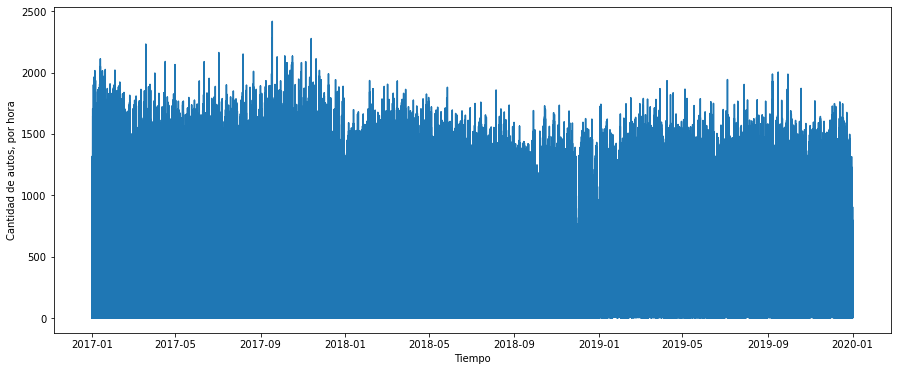

In [25]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [26]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
#en este caso estaremos trabajando con el dataset de la autopista Illia
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

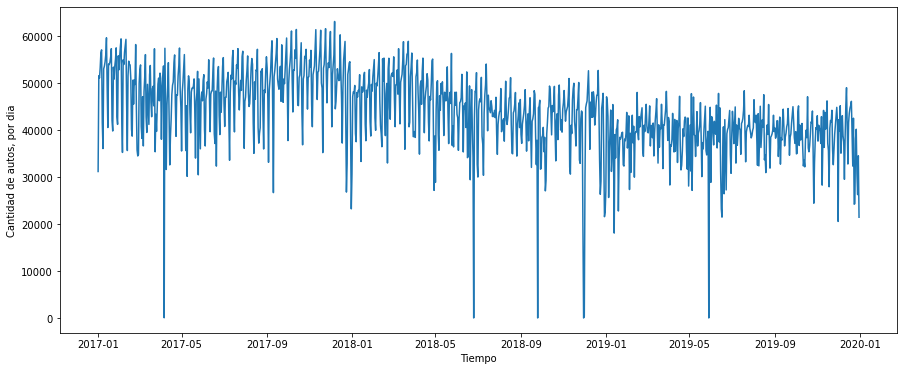

In [27]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [28]:
#Observamos la gráfica semanal
semanal = dataset.resample('W', on = 'fecha').sum()
semanal.head()

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-08          347212
2017-01-15          366413
2017-01-22          357215
2017-01-29          354581

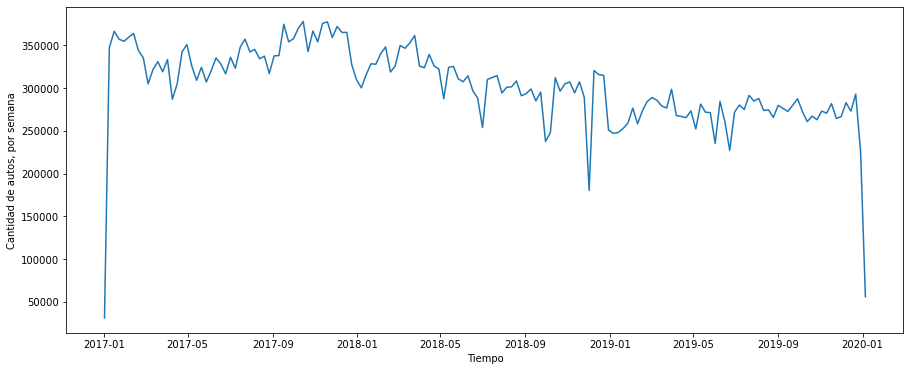

In [29]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

### Análisis a diferentes ventanas
A continuación avanzaremos en el análisis en diferentes ventanas temporales, yendo desde lo general a lo particular.
1. Inicialmente observaremos el comportamiento anual con ventanas semanales
1. Luego el comportamiento diario dentro de la semana.
1. Finalmente el comportamiento horario dentro de cada día.

1. Adicional al análisis anterior, observaremos el comportamiento diario dentro del mes.

Los análisis mencionados se realizarán **separando el tránsito pesado del liviano** con el objetivo de identificar si estos presentan *diferentes comportamientos*.

El objetivo de este análisis exploratorio es identificar si existe algún tipo de tendencia o estacionalidad que nos permita entender de mejor manera el comportamiento del fenómento bajo estudio.

In [30]:
semanal.reset_index(inplace = True)

In [31]:
#Agregamos el número de semana para luego graficarlo
semanal['semana'] = semanal.fecha.dt.isocalendar().week

In [32]:
#Separamos el dato de año
semanal['anio'] = semanal.fecha.dt.year
semanal

fecha  cantidad_pasos  semana  anio
0   2017-01-01           31183      52  2017
1   2017-01-08          347212       1  2017
2   2017-01-15          366413       2  2017
3   2017-01-22          357215       3  2017
4   2017-01-29          354581       4  2017
..         ...             ...     ...   ...
153 2019-12-08          282891      49  2019
154 2019-12-15          272960      50  2019
155 2019-12-22          292881      51  2019
156 2019-12-29          226390      52  2019
157 2020-01-05           55970       1  2020

[158 rows x 4 columns]

In [33]:
semanal_2018 = semanal[semanal.anio == 2018].reset_index(drop=True)

In [34]:
semanal_2017 = semanal[semanal.anio == 2017].reset_index(drop=True)

In [35]:
semanal_2019 = semanal[semanal.anio == 2019].reset_index(drop=True)

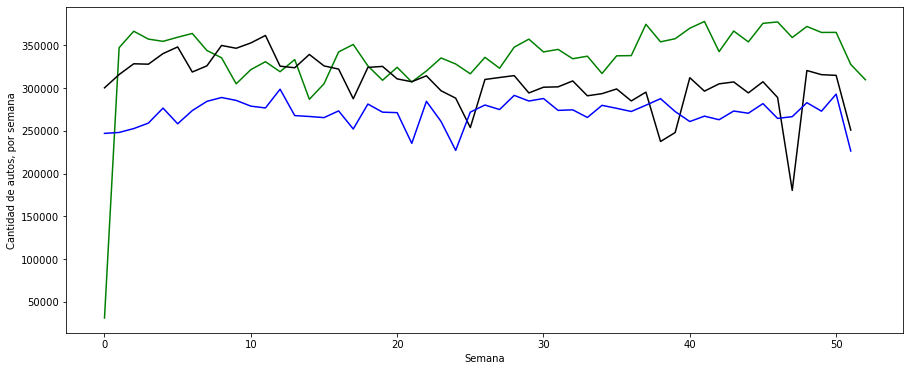

In [36]:
plt.figure(figsize = (15,6))
plt.plot(semanal_2017.cantidad_pasos, color = 'g')
plt.plot(semanal_2018.cantidad_pasos, color = 'k')
plt.plot(semanal_2019.cantidad_pasos, color = 'b')

plt.xlabel('Semana')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

In [37]:
#armamos el dataset para el caso de transito pesado
semanal_P = dataset[dataset.tipo_vehiculo == 'Pesado'].resample('W', on = 'fecha').sum().reset_index()
semanal_P['semana'] = semanal_P.fecha.dt.isocalendar().week
semanal_P['anio'] = semanal_P.fecha.dt.year
semanal_P.head()

fecha  cantidad_pasos  semana  anio
0 2017-01-01             542      52  2017
1 2017-01-08           17049       1  2017
2 2017-01-15           17290       2  2017
3 2017-01-22           16775       3  2017
4 2017-01-29           16897       4  2017

In [38]:
semanal_2017_P = semanal_P[semanal_P.anio == 2017].reset_index(drop=True)

In [39]:
semanal_2018_P = semanal_P[semanal_P.anio == 2018].reset_index(drop=True)

In [40]:
semanal_2019_P = semanal_P[semanal_P.anio == 2019].reset_index(drop=True)

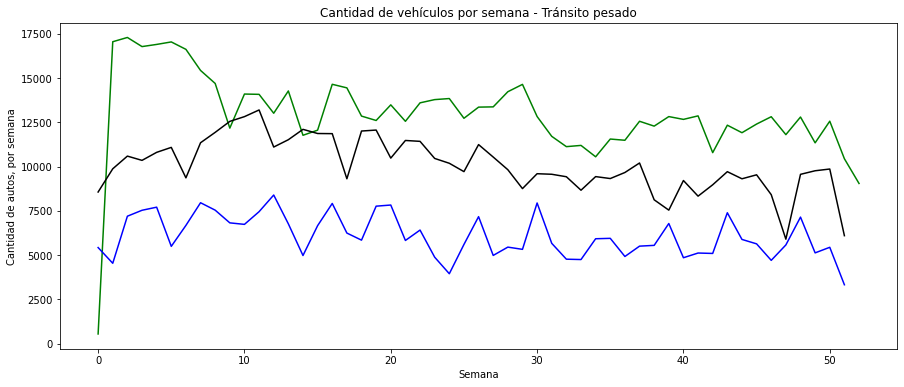

In [41]:
plt.figure(figsize = (15,6))
plt.plot(semanal_2017_P.cantidad_pasos, color = 'g')
plt.plot(semanal_2018_P.cantidad_pasos, color = 'k')
plt.plot(semanal_2019_P.cantidad_pasos, color = 'b')

plt.title('Cantidad de vehículos por semana - Tránsito pesado')
plt.xlabel('Semana')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

A continuación observaremos el comportamiento dentro del mes para analizar si existe una tendencia dentro del mes, o algún comportameinto que sea importante detectar.

In [42]:
dataset['dia_mes'] = dataset.fecha.dt.day
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha  \
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00   
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00   
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00   
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00   
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00   
...         ...        ...           ...             ...                 ...   
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00   
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00   
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00   
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00   
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00   

        dia_mes  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
238864       31  
238865       31  
238866       31  
238867       31  
238868       31  

[238869 rows x 6 columns]

In [43]:
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9:'Septiembre', 10: 'Octubre', 11: 'Noviembre',12: 'Diciembre'}
dataset['mes'] = dataset.fecha.dt.month
dataset['mes_n'] = dataset.mes.map(meses)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha  \
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00   
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00   
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00   
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00   
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00   
...         ...        ...           ...             ...                 ...   
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00   
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00   
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00   
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00   
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00   

        dia_mes  mes      mes_n  
0             1    1      Enero  
1             1    1      Enero  
2             1    1      Enero  
3             1    1      Enero  
4             1    1      Enero  
...         ...  ...        ...  
238864       31   12  Diciembre  
238865       31   12  Diciembre  
238866       31   12  Diciembre  
238867       31   12  Diciembre  
238868       31   12  Diciembre  

[238869 rows x 8 columns]

In [44]:
dia_mes = dataset.groupby(['mes', 'mes_n', 'dia_mes']).sum().reset_index()
dia_mes

mes      mes_n  dia_mes  cantidad_pasos
0      1      Enero        1           88956
1      1      Enero        2          145778
2      1      Enero        3          145449
3      1      Enero        4          144172
4      1      Enero        5          131641
..   ...        ...      ...             ...
360   12  Diciembre       27          139020
361   12  Diciembre       28          132825
362   12  Diciembre       29          116261
363   12  Diciembre       30           96051
364   12  Diciembre       31           67275

[365 rows x 4 columns]

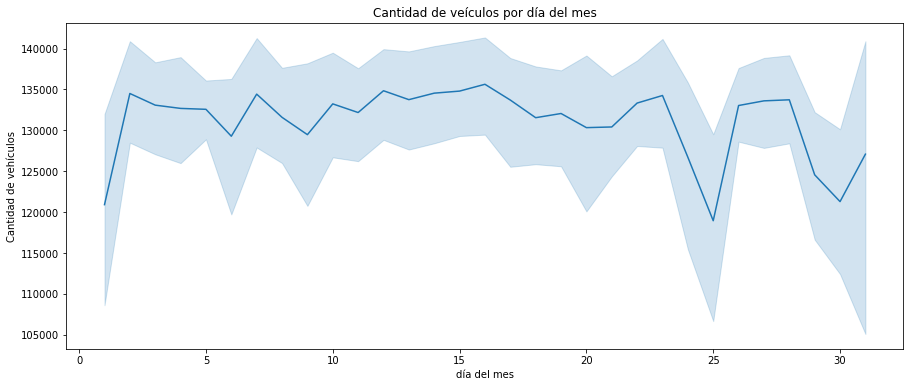

In [45]:
plt.figure(figsize = (15,6))
sns.lineplot(data = dia_mes, x = 'dia_mes', y = 'cantidad_pasos')
plt.title('Cantidad de veículos por día del mes')
plt.xlabel('día del mes')
plt.ylabel('Cantidad de vehículos')
plt.show()

Observaremos la misma gráfica pero para el caso del tránsito pesado

In [46]:
#inicialmente crearemos el dataset pero manteniendo el tipo de vehículo
dia_mes_tipo = dataset.groupby(['mes', 'mes_n', 'dia_mes', 'tipo_vehiculo']).sum().reset_index()
dia_mes_tipo.head()

mes  mes_n  dia_mes tipo_vehiculo  cantidad_pasos
0    1  Enero        1       Liviano           87938
1    1  Enero        1        Pesado            1018
2    1  Enero        2       Liviano          140139
3    1  Enero        2        Pesado            5639
4    1  Enero        3       Liviano          139735

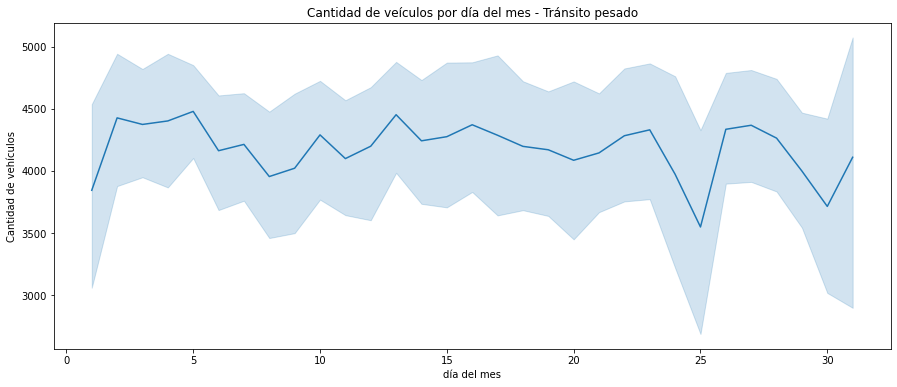

In [47]:
plt.figure(figsize = (15,6))
sns.lineplot(data = dia_mes_tipo[dia_mes_tipo.tipo_vehiculo == 'Pesado'], x = 'dia_mes', y = 'cantidad_pasos')
plt.title('Cantidad de veículos por día del mes - Tránsito pesado')
plt.xlabel('día del mes')
plt.ylabel('Cantidad de vehículos')
plt.show()

A continuación observaremos el comportamiento dentro de la semana para transito liviano y tránsito pesado.

In [48]:
#definimos el orden en el que queremos ver los días de la semana
cats = [ 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

#sacamos el promedio de pasos por día sumando la cantidad y dividiendo por la cantidad de semanas.  Inicialmente observaremos el dato para el tránsito liviano
dias_semana_L = dataset[dataset.tipo_vehiculo == 'Liviano'].groupby(['dia']).sum().reindex(cats)/semanal.shape[0]
dias_semana_L

cantidad_pasos      dia_mes         mes
dia                                               
Lunes        40950.025316  1235.253165  516.911392
Martes       41937.215190  1249.278481  509.816456
Miércoles    43482.626582  1244.778481  513.272152
Jueves       44597.531646  1246.265823  515.063291
Viernes      46721.094937  1231.797468  515.797468
Sábado       39685.506329  1239.208861  514.968354
Domingo      35907.829114  1233.436709  518.512658

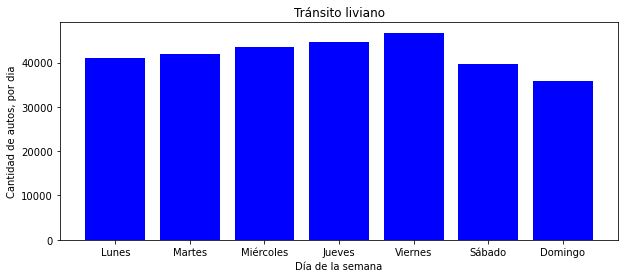

In [49]:
plt.figure(figsize = (10,4))
plt.bar( dias_semana_L.index, dias_semana_L.cantidad_pasos , color = 'b')
plt.title('Tránsito liviano')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [50]:
#Repetimos el análisis para el tránsito pesado
dias_semana_P = dataset[dataset.tipo_vehiculo == 'Pesado'].groupby(['dia']).sum().reindex(cats)/semanal.shape[0]
dias_semana_P

cantidad_pasos      dia_mes         mes
dia                                               
Lunes         1400.525316  2123.164557  866.468354
Martes        1515.639241  2191.683544  874.791139
Miércoles     1615.639241  2243.879747  912.481013
Jueves        1618.727848  2237.512658  917.759494
Viernes       1679.360759  2240.968354  931.556962
Sábado        1084.841772  2079.449367  849.841772
Domingo        750.151899  1907.898734  783.139241

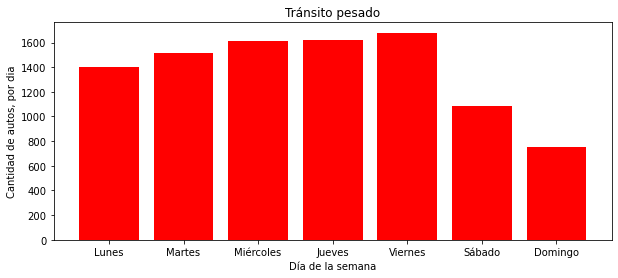

In [51]:
plt.figure(figsize = (10,4))

plt.bar( dias_semana_P.index, dias_semana_P.cantidad_pasos, color = 'r')
plt.title('Tránsito pesado')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Se observa un mayor flujo de vehículos durante la semana para ambos casos.  Sin embargo, el tránsito pesado presenta una mayor caida durante los días de fin de semana respecto a los días hábiles, en comparación al comportamiento del tránsito liviano.

A continuación observaremos el comportamiento de ingreso y egreso por horas dentro de una semana.

In [52]:
dataset['horas'] = dataset.fecha.dt.hour

In [53]:
dia_horas = dataset.groupby(['dia','horas']).sum().reset_index()
dia_horas

dia  horas  cantidad_pasos  dia_mes   mes
0    Domingo      0          175503    20757  8629
1    Domingo      1          174892    18995  7745
2    Domingo      2          158936    18455  7469
3    Domingo      3          126493    18361  7546
4    Domingo      4           84218    17232  7055
..       ...    ...             ...      ...   ...
163  Viernes     19          465097    24249  9907
164  Viernes     20          405452    23407  9793
165  Viernes     21          379383    22634  9333
166  Viernes     22          318075    21657  8962
167  Viernes     23          230267    21301  8865

[168 rows x 5 columns]

Inicialmente analizaremos el comportamiento de los días hábiles (de lunes a viernes), sin diferenciar ingreso y egreso.

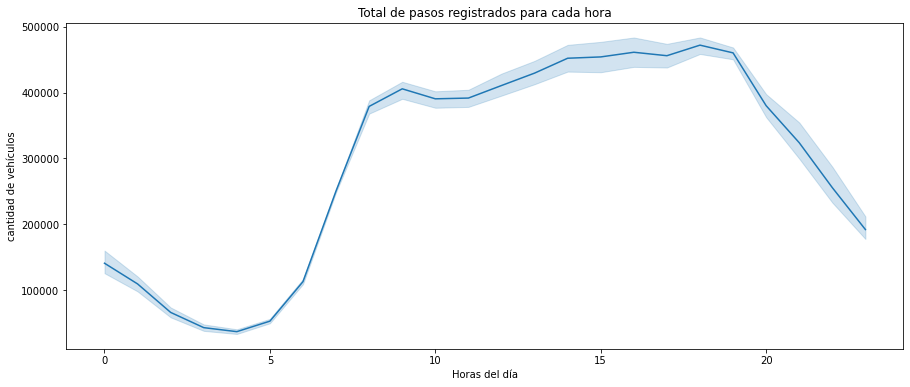

In [54]:
plt.figure(figsize = (15,6))
sns.lineplot(data = dia_horas[(dia_horas.dia != 'Sábado')&(dia_horas.dia != 'Domingo')], x = 'horas', y = 'cantidad_pasos')
plt.xlabel('Horas del día')
plt.ylabel('cantidad de vehículos')
plt.title('Total de pasos registrados para cada hora')
plt.show()

In [55]:
dia_horas = dataset.groupby(['dia','horas', 'sentido']).sum().reset_index()
dia_horas

dia  horas    sentido  cantidad_pasos  dia_mes   mes
0    Domingo      0     Centro           91070    11115  4582
1    Domingo      0  Provincia           84433     9642  4047
2    Domingo      1     Centro           84397     9821  4041
3    Domingo      1  Provincia           90495     9174  3704
4    Domingo      2     Centro           75607     9565  3841
..       ...    ...        ...             ...      ...   ...
331  Viernes     21  Provincia          175224    10612  4426
332  Viernes     22     Centro          164624    11561  4749
333  Viernes     22  Provincia          153451    10096  4213
334  Viernes     23     Centro          112396    11142  4583
335  Viernes     23  Provincia          117871    10159  4282

[336 rows x 6 columns]

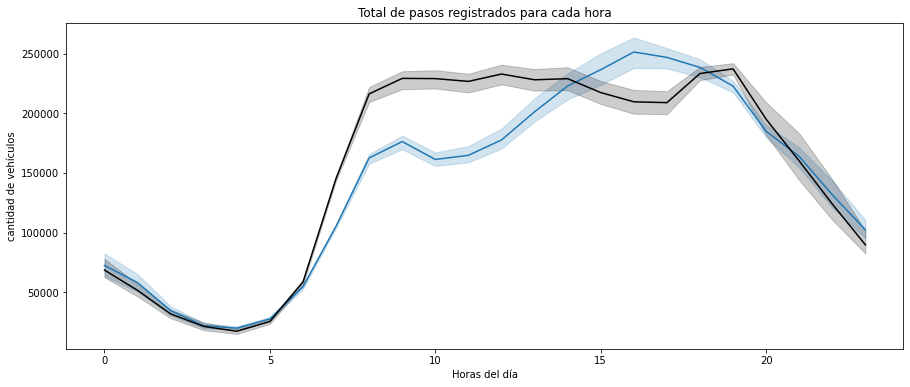

In [56]:
#Observamos por separado el comportamiento de ingreso y egreso.
plt.figure(figsize = (15,6))
sns.lineplot(data = dia_horas[(dia_horas.dia != 'Sábado')&(dia_horas.dia != 'Domingo')&(dia_horas.sentido == 'Provincia')], x = 'horas', y = 'cantidad_pasos')#, hue = 'dia', hue_order = cats)
sns.lineplot(data = dia_horas[(dia_horas.dia != 'Sábado')&(dia_horas.dia != 'Domingo')&(dia_horas.sentido == 'Centro')], x = 'horas', y = 'cantidad_pasos', color = 'k')#, hue = 'dia', hue_order = cats)
plt.xlabel('Horas del día')
plt.ylabel('cantidad de vehículos')
plt.title('Total de pasos registrados para cada hora')
plt.show()

A continuación observaermos el comportamiento de los días sábado y domingo.

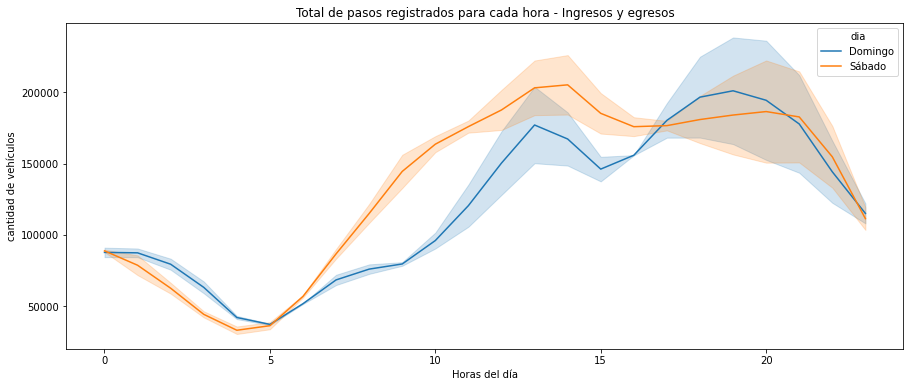

In [57]:
plt.figure(figsize = (15,6))
sns.lineplot(data = dia_horas[(dia_horas.dia == 'Sábado')|(dia_horas.dia == 'Domingo')], x = 'horas', y = 'cantidad_pasos', hue = 'dia')
plt.xlabel('Horas del día')
plt.ylabel('cantidad de vehículos')
plt.title('Total de pasos registrados para cada hora - Ingresos y egresos')
plt.show()

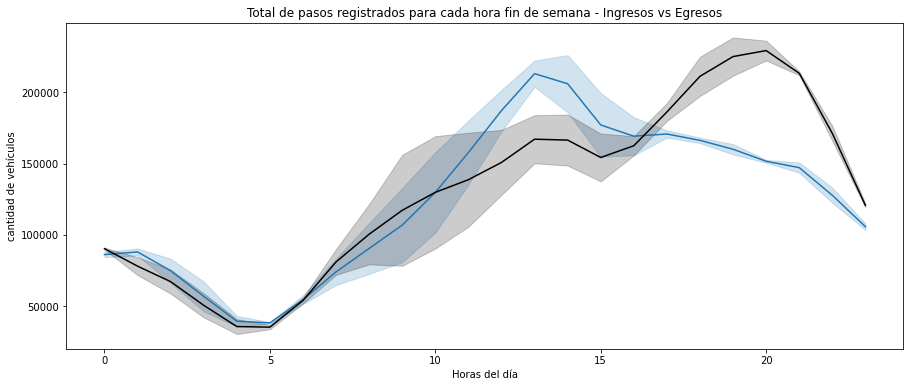

In [58]:
plt.figure(figsize = (15,6))
sns.lineplot(data = dia_horas[((dia_horas.dia == 'Sábado')|(dia_horas.dia == 'Domingo'))&(dia_horas.sentido == 'Provincia')], x = 'horas', y = 'cantidad_pasos')
sns.lineplot(data = dia_horas[((dia_horas.dia == 'Sábado')|(dia_horas.dia == 'Domingo'))&(dia_horas.sentido == 'Centro')], x = 'horas', y = 'cantidad_pasos', color = 'k')
plt.xlabel('Horas del día')
plt.ylabel('cantidad de vehículos')
plt.title('Total de pasos registrados para cada hora fin de semana - Ingresos vs Egresos')
plt.show()

A continuación observaremos el comportamiento por tipo de vehículo

In [59]:
dia_horas_tipo = dataset.groupby(['dia','horas', 'sentido', 'tipo_vehiculo']).sum().reset_index()
dia_horas_tipo.head()

dia  horas    sentido tipo_vehiculo  cantidad_pasos  dia_mes   mes
0  Domingo      0     Centro       Liviano           88529     4045  1695
1  Domingo      0     Centro        Pesado            2541     7070  2887
2  Domingo      0  Provincia       Liviano           83018     3999  1686
3  Domingo      0  Provincia        Pesado            1415     5643  2361
4  Domingo      1     Centro       Liviano           82744     4060  1677

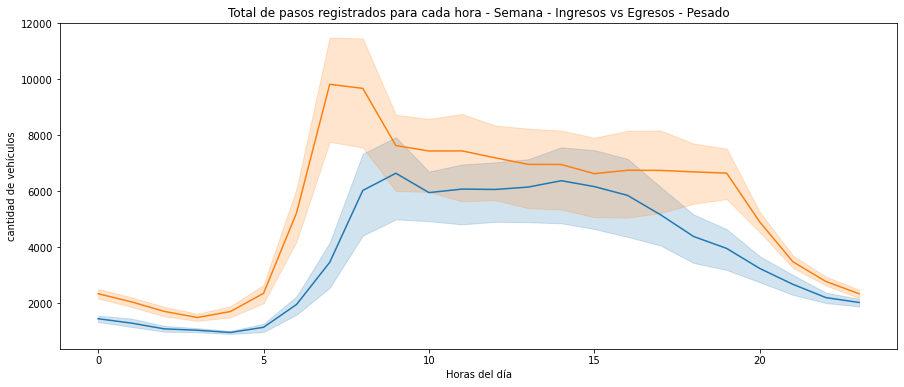

In [60]:
plt.figure(figsize = (15,6))
sns.lineplot(data = dia_horas_tipo[(dia_horas_tipo.tipo_vehiculo == 'Pesado') & ((dia_horas_tipo.dia != 'Sábado')|(dia_horas_tipo.dia != 'Domingo'))&(dia_horas_tipo.sentido == 'Provincia')], x = 'horas', y = 'cantidad_pasos')
sns.lineplot(data = dia_horas_tipo[(dia_horas_tipo.tipo_vehiculo == 'Pesado') & ((dia_horas_tipo.dia != 'Sábado')|(dia_horas_tipo.dia != 'Domingo'))&(dia_horas_tipo.sentido == 'Centro')], x = 'horas', y = 'cantidad_pasos')
plt.xlabel('Horas del día')
plt.ylabel('cantidad de vehículos')
plt.title('Total de pasos registrados para cada hora - Semana - Ingresos vs Egresos - Pesado')
plt.show()

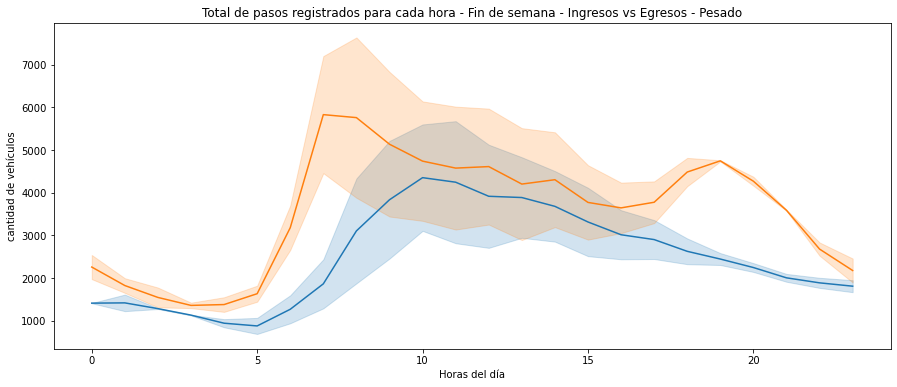

In [61]:
plt.figure(figsize = (15,6))
sns.lineplot(data = dia_horas_tipo[(dia_horas_tipo.tipo_vehiculo == 'Pesado') & ((dia_horas_tipo.dia == 'Sábado')|(dia_horas_tipo.dia == 'Domingo'))&(dia_horas_tipo.sentido == 'Provincia')], x = 'horas', y = 'cantidad_pasos')#, hue = 'dia', hue_order = cats)
sns.lineplot(data = dia_horas_tipo[(dia_horas_tipo.tipo_vehiculo == 'Pesado') & ((dia_horas_tipo.dia == 'Sábado')|(dia_horas_tipo.dia == 'Domingo'))&(dia_horas_tipo.sentido == 'Centro')], x = 'horas', y = 'cantidad_pasos')
plt.xlabel('Horas del día')
plt.ylabel('cantidad de vehículos')
plt.title('Total de pasos registrados para cada hora - Fin de semana - Ingresos vs Egresos - Pesado')
plt.show()

## Conclusiones análisis exploratorio

Se pudo observar en el análisis que, a lo largo de los años, el comportamiento general del pago en efectivo presenta una tendencia decreciente, compensada por una tendencia creciente de los métodos automáticos de pago (*Telepase*).

### Análisis estacional
En cuanto al comportamiento estacional, no se identificaron en la gráfica comportamientos representativos a nivel anual ni mensual.  Sin embargo, a nivel semanal se observa un comportamiento de los días con una marcada disminución del volumen para los días sábado y domingo. 

Respecto al comportamietno horario, se observa una marcada diferencia en los valores en la ventana horaria entre las 8 y las 20 horas, con comportamientos diferenciados para el ingreso y egreso a la capital, presentando un mayor flujo hacia la capital en las horas de la mañana y un flujo inverso con pico a las 17 horas.

Para los días de fin de semana se observa un comportamiento inverso al del resto de la semana, con un marcado volumen en sentido provincia durante la mañana y una concentración en el sentido a capital durante la tarde, en especial los días domingo con pico a las 20 horas aproximadamente.

### Tránsito pesado
El tránsito pesado no resulta representativo en la cantidad de registros en comparación al tránsito liviano. Sin embargo, en la dinámica diaria, los transportes pesados presentan una naturaleza completamente diferente en cuanto al movimiento asociado a su tamaño y velocidad, y responden principamente a cuestiones logísticas, en ocasiones ligadas al puerto cercano a la estación de peaje en cuestión.  
Por este motivo, si bien inicialmente no resultó resperentativo en valores, se le prestó especial atención a su comportamiento, identificándose algunas partiularidades en los volúmenes de ingreso y egresos horarios, para los días de la semana y fines de semana.

# Modelos de series de tiempo

A continuación se avanzará en el desrarollo de diferentes modelos de series de tiempo.

Se aplicará la metodología de Box Jenkins utilizando inicialmente la ventana diaria y luego semanal para comparar su comportamiento y ajustes.
Luego se probará el comportamiento de modelos de Machine Learning, los cuales serán contrastados con los anteriores.

Inicialmente comenzaremos con la descomposición de la serie de tiempo.

In [62]:
semanal.head()

fecha  cantidad_pasos  semana  anio
0 2017-01-01           31183      52  2017
1 2017-01-08          347212       1  2017
2 2017-01-15          366413       2  2017
3 2017-01-22          357215       3  2017
4 2017-01-29          354581       4  2017

In [63]:
#ventana = int(365*2/7)
ventana=4*6
semanal_promedio_tendencia = semanal.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: cantidad_pasos, dtype: float64

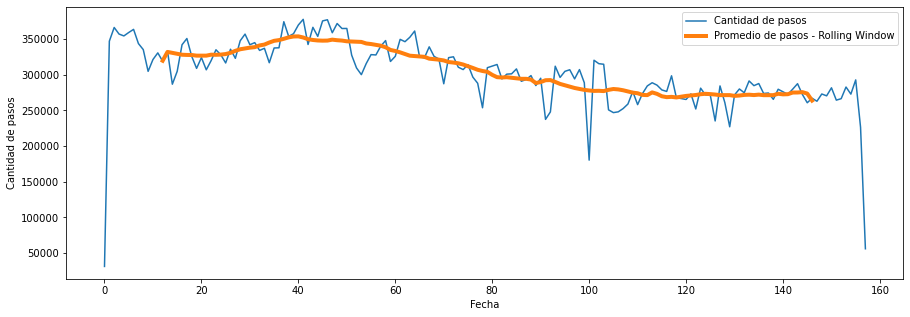

In [64]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Promedio de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

**Tendencia Lineal**

A continuación se realizará la tendencia lineal.

In [65]:
semanal['fecha_numeros']=semanal.fecha.map(datetime.datetime.toordinal)
semanal.head()

fecha  cantidad_pasos  semana  anio  fecha_numeros
0 2017-01-01           31183      52  2017         736330
1 2017-01-08          347212       1  2017         736337
2 2017-01-15          366413       2  2017         736344
3 2017-01-22          357215       3  2017         736351
4 2017-01-29          354581       4  2017         736358

In [66]:
#creamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.cantidad_pasos)

LinearRegression()

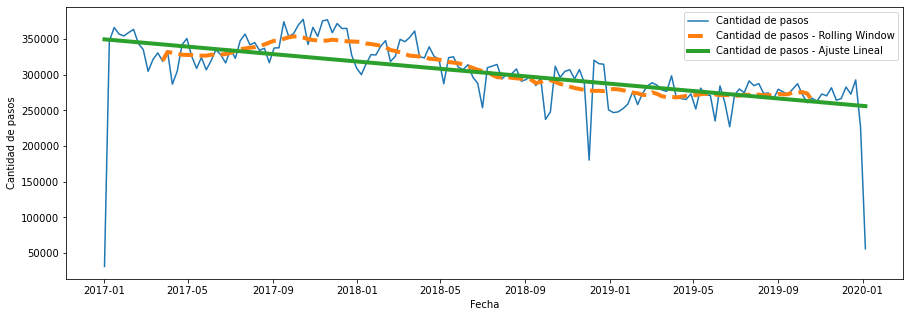

In [67]:
#Graficamos la serie original, la media movil y la regresión lineal
plt.figure(figsize = (15,5))
plt.plot(semanal.fecha, semanal.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(semanal.fecha, semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.plot(semanal.fecha, lr.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Se observa una clara tendencia decreciente, como ya se había anticipado en la primer parte de análisis exploratorio.

A continuación se obtienen las componentes restantes. 

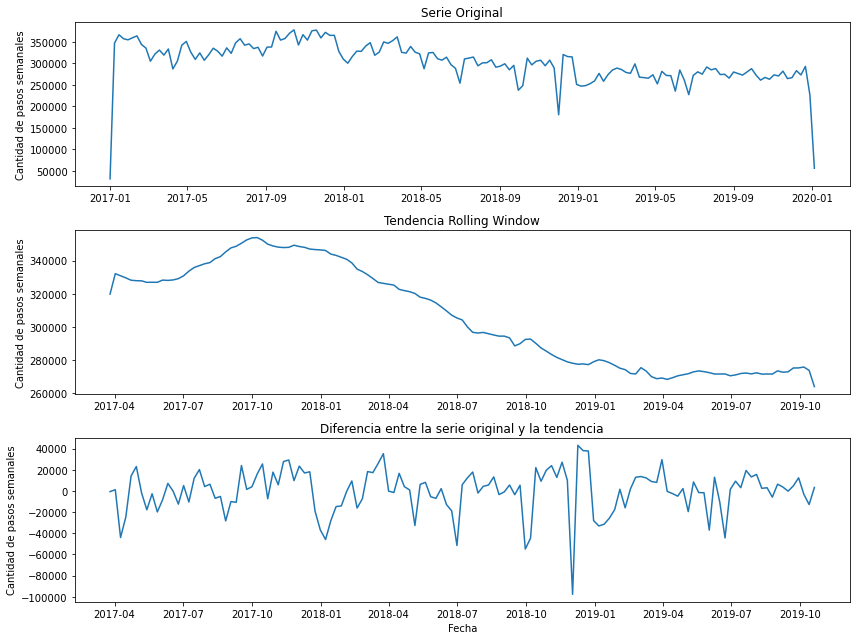

In [68]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(semanal.fecha, semanal.cantidad_pasos)
plt.ylabel('Cantidad de pasos semanales')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(semanal.fecha, semanal_promedio_tendencia)
plt.ylabel('Cantidad de pasos semanales')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(semanal.fecha, semanal.cantidad_pasos - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos semanales')

plt.tight_layout()
plt.show()


Realizaremos la dscomposición que nos proporciona *statsmodels*, *seasonal_decompose*.

In [69]:
semanal_fecha = semanal.set_index(semanal.fecha)

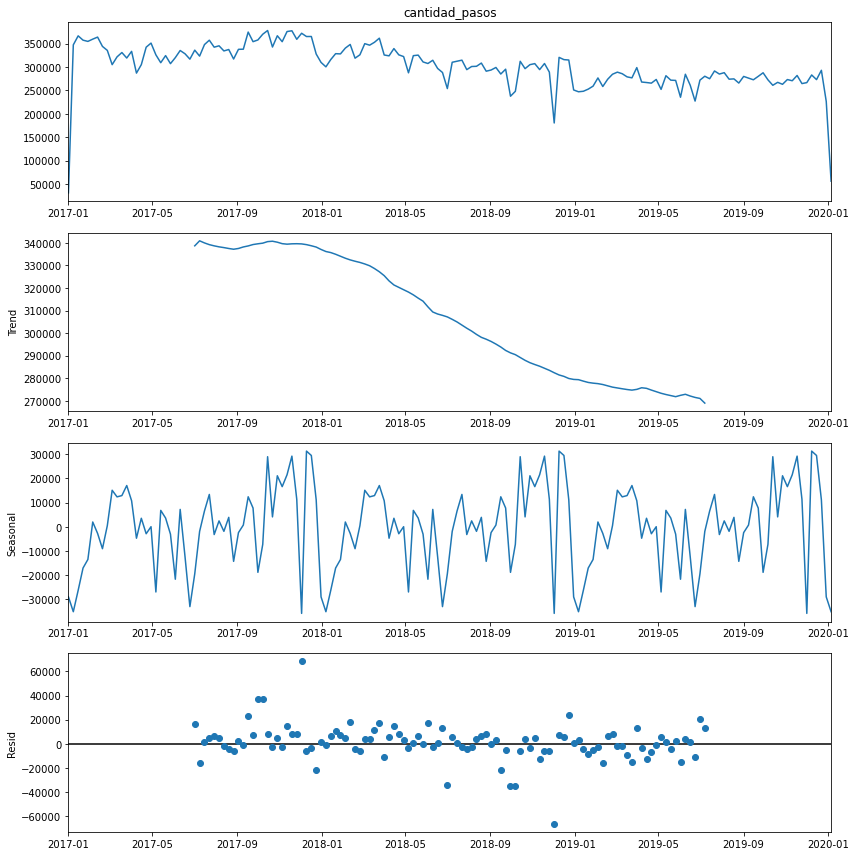

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

matplotlib.rcParams['figure.figsize'] = [12,12]
result = seasonal_decompose(semanal_fecha.cantidad_pasos, model='additive')
result.plot()
plt.show()

Graficamos la distribuciòn de los errores

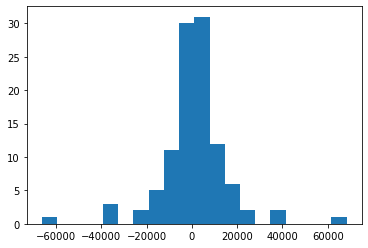

In [71]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

Repetimos el análisis para la ventana diaria

In [72]:
ventana=int(365/4)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia.head()

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
Freq: D, Name: cantidad_pasos, dtype: float64

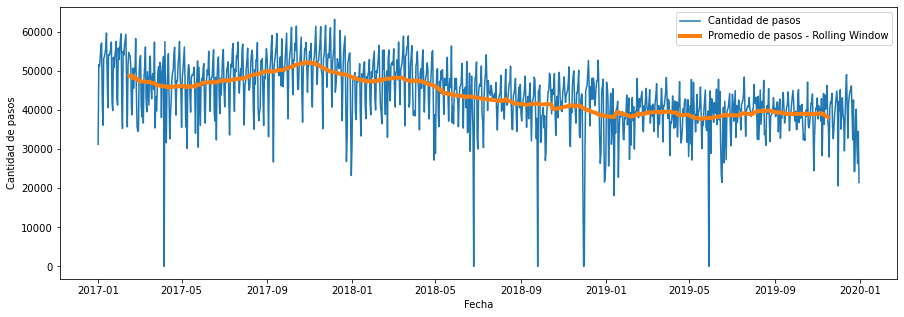

In [73]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Promedio de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

**Tendencia Lineal**

A continuación se realizará la tendencia lineal.

In [74]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

cantidad_pasos  fecha_numeros
fecha                                    
2017-01-01           31183         736330
2017-01-02           51568         736331
2017-01-03           51093         736332
2017-01-04           53332         736333
2017-01-05           56486         736334

In [75]:
#creamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lr_diario = LinearRegression()
lr_diario.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

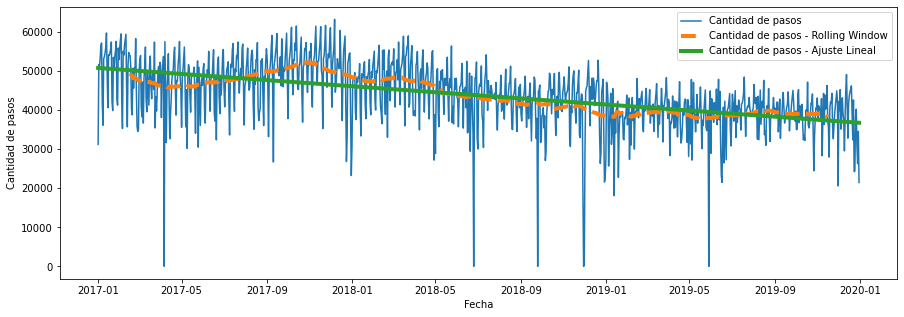

In [76]:
#Graficamos la serie original, la media movil y la regresión lineal
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario.index, diario_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.plot(diario.index, lr_diario.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Al igual que en las gráficas semanales, se observa una clara tendencia decreciente.
A continuación se obtienen las componentes restantes. 

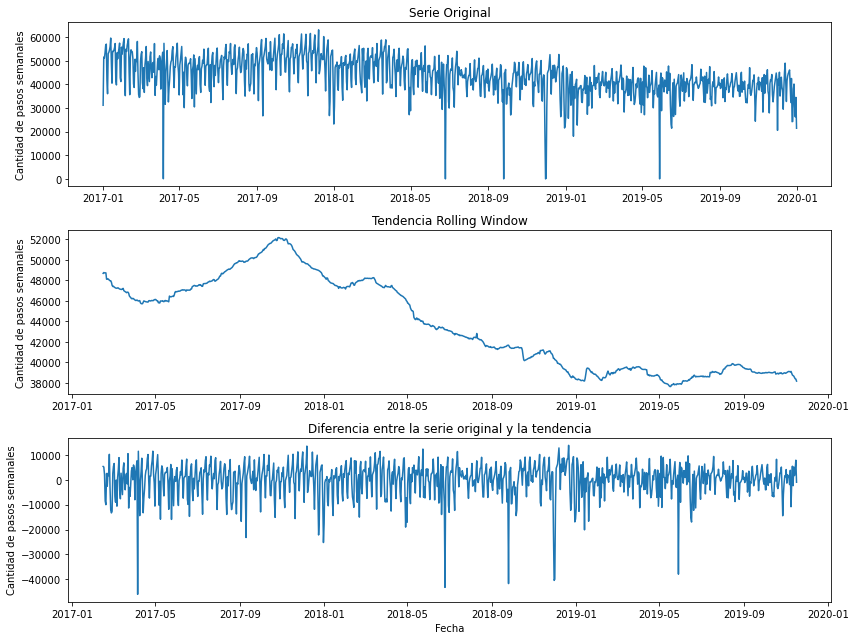

In [77]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de pasos semanales')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(diario.index, diario_promedio_tendencia)
plt.ylabel('Cantidad de pasos semanales')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos semanales')

plt.tight_layout()
plt.show()


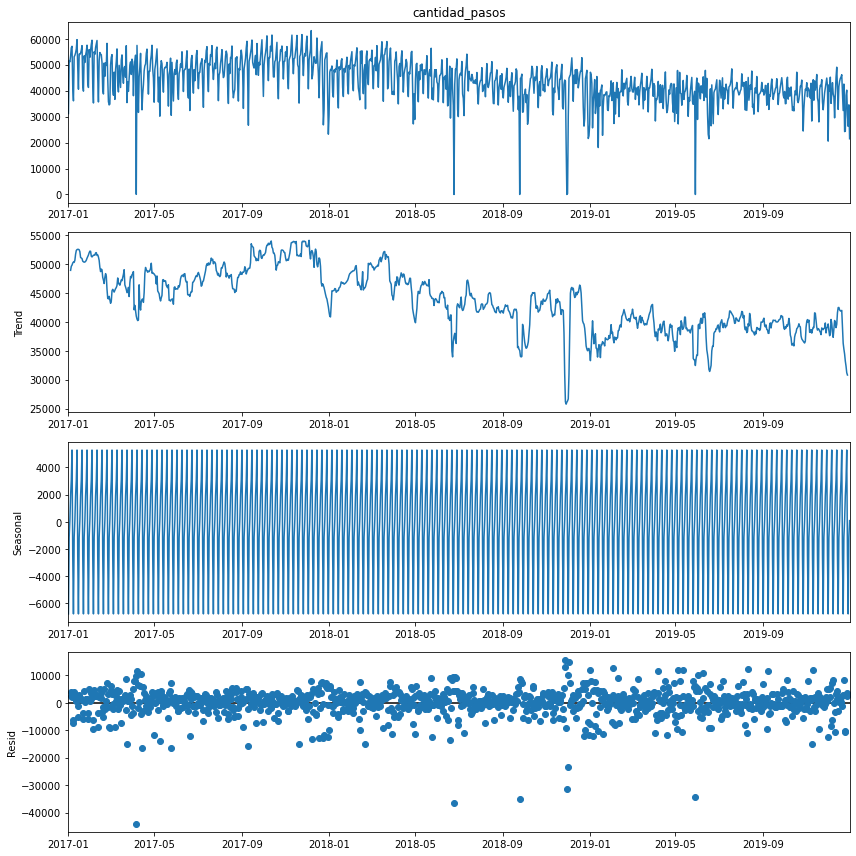

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

matplotlib.rcParams['figure.figsize'] = [12,12]
result = seasonal_decompose(diario.cantidad_pasos, model='additive')
result.plot()
plt.show()

Graficamos la distribuciòn de los errores

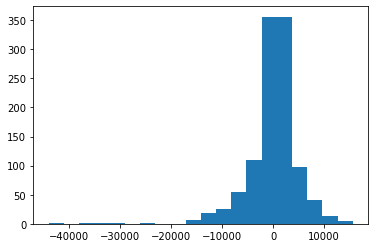

In [79]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

Se observan en los errores valores extremos que deberian ser tratados.  Luego, la distribución de la masa de valores se acerca a la normal.

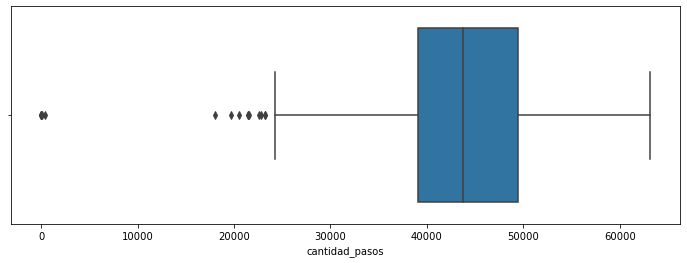

In [80]:
#graficamos un boxplot de los pasos diarios
plt.figure(figsize = (12,4))
sns.boxplot(x=diario.cantidad_pasos)
plt.show()

In [81]:
#eliminamos los registros menores a 20.000 pasos diarios
diario.cantidad_pasos[diario.cantidad_pasos < 22000] = np.nan

In [82]:
diario.isna().sum()

cantidad_pasos    12
fecha_numeros      0
dtype: int64

In [83]:
#interpolamos para completar los N/A generados en la eliminación de outliers
diario = diario.interpolate()

In [84]:
diario.isna().sum()

cantidad_pasos    0
fecha_numeros     0
dtype: int64

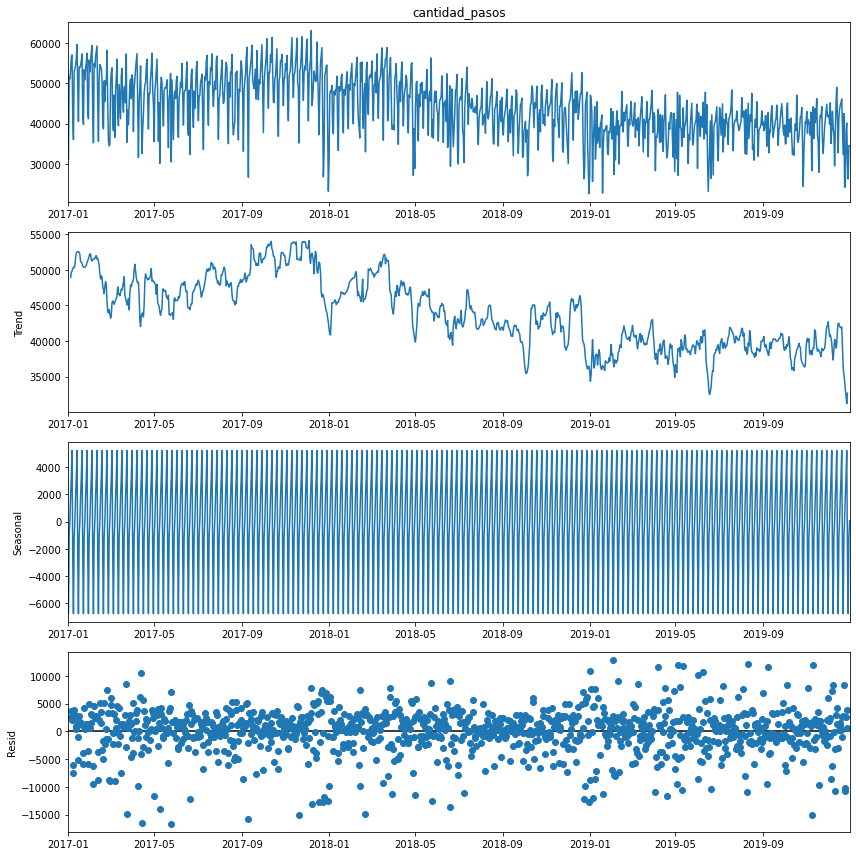

In [85]:
#Realizamos nuevamente la descomposición estacional de statsmodels
matplotlib.rcParams['figure.figsize'] = [12,12]
result = seasonal_decompose(diario.cantidad_pasos, model='additive')
result.plot()
plt.show()

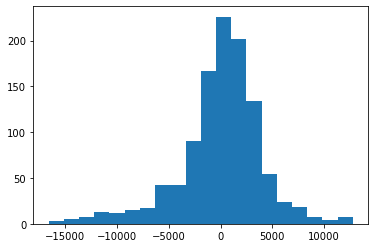

In [86]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

Crearemos un nuevo set de datos agrupado semanal a partir de los datos pretratados diarios

In [87]:
#Utilizaremos el dato promedio semana realizando un resample sobre el dataset diario.
semanal= diario.resample("W").mean()

In [88]:
semanal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158 entries, 2017-01-01 to 2020-01-05
Freq: W-SUN
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cantidad_pasos  158 non-null    float64
 1   fecha_numeros   158 non-null    float64
dtypes: float64(2)
memory usage: 3.7 KB


In [89]:
diario.drop(columns = ['fecha_numeros'], inplace = True)
diario.head()

cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-02         51568.0
2017-01-03         51093.0
2017-01-04         53332.0
2017-01-05         56486.0

In [90]:
semanal.drop(columns = ['fecha_numeros'], inplace = True)

In [91]:
#Definimos las fechas máximas para el test y para el train
max_train = '30-09-2019'
max_test = '31-12-2019'

In [92]:
#Creamos un dataframe donde iremos almacenando los resultados de cada modelo
resultados = pd.DataFrame(columns = ['Modelo', 'RMSE', 'MAE', 'MAPE', 'MAPE vs Benchmark'])

In [93]:
#Creamos los dataset de train y test
diario_train = diario[diario.index<= max_train]
diario_test= diario[(diario.index>max_train)&(diario.index<=max_test)]
semanal_train = semanal[semanal.index<= max_train]
semanal_test = semanal[(semanal.index>max_train)&(semanal.index<=max_test)]

## Benchmark

Utilizaremos la regresión lineal como *Benchmark* para comparar el resto de los modelos que vayamos probando.
Calcularemos los errores y los almacenaremos en la variable "resultado"

In [94]:
diario_train_lr = diario_train.copy()
diario_test_lr = diario_test.copy()
diario_train_lr['fecha_numeros']=diario_train.index.map(datetime.datetime.toordinal)
diario_test_lr['fecha_numeros']=diario_test.index.map(datetime.datetime.toordinal)

In [95]:
#creamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
lr_diario = LinearRegression()
lr_diario.fit(diario_train_lr.fecha_numeros.values.reshape(-1, 1), diario_train_lr.cantidad_pasos)

LinearRegression()

In [96]:
diario_test['Benchmark_LRD'] = lr_diario.predict(diario_test_lr.fecha_numeros.values.reshape(-1, 1))

<ipython-input-96-92c082a6c826>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario_test['Benchmark_LRD'] = lr_diario.predict(diario_test_lr.fecha_numeros.values.reshape(-1, 1))


In [97]:
#Realizamos el cálculo de los errores
rmse_lr = np.sqrt(mean_squared_error(diario_test.cantidad_pasos, diario_test.Benchmark_LRD))
mae_lr =  mean_absolute_error(diario_test.cantidad_pasos, diario_test.Benchmark_LRD)
mape_lr = np.mean(np.abs((diario_test.cantidad_pasos - diario_test.Benchmark_LRD) / diario_test.cantidad_pasos)) * 100

In [98]:
print("RMSE de modelo diario RL:", rmse_lr) #presentamos el RMSE del modelo diario RL
print("\nMAE de modelo diario RL:", mae_lr) #presentamos el MAE del modelo diario RL
print("\nMAPE de modelo diario RL:", mape_lr) #presentamos el MAPE del modelo diario RL

RMSE de modelo diario RL: 5323.062542417374

MAE de modelo diario RL: 4292.709168369963

MAPE de modelo diario RL: 11.687854762596567


In [99]:
resultados = resultados.append(pd.DataFrame({'Modelo':['Benchmark_LR'], 'RMSE':[rmse_lr], 'MAE':[mae_lr], 'MAPE':[mape_lr]}), ignore_index=True)

In [100]:
resultados

Modelo         RMSE          MAE       MAPE MAPE vs Benchmark
0  Benchmark_LR  5323.062542  4292.709168  11.687855               NaN

## Metolodogía de Box Jenkins

A continuación aplicaremos la metodología de Box Jenkins tanto para la ventana semanal como diaria, y compararemos los resultados obtenidos.

In [101]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

Generamos y analizamos las gráficas de autocorrelación y autocorrelación parcial para el dataset diario.

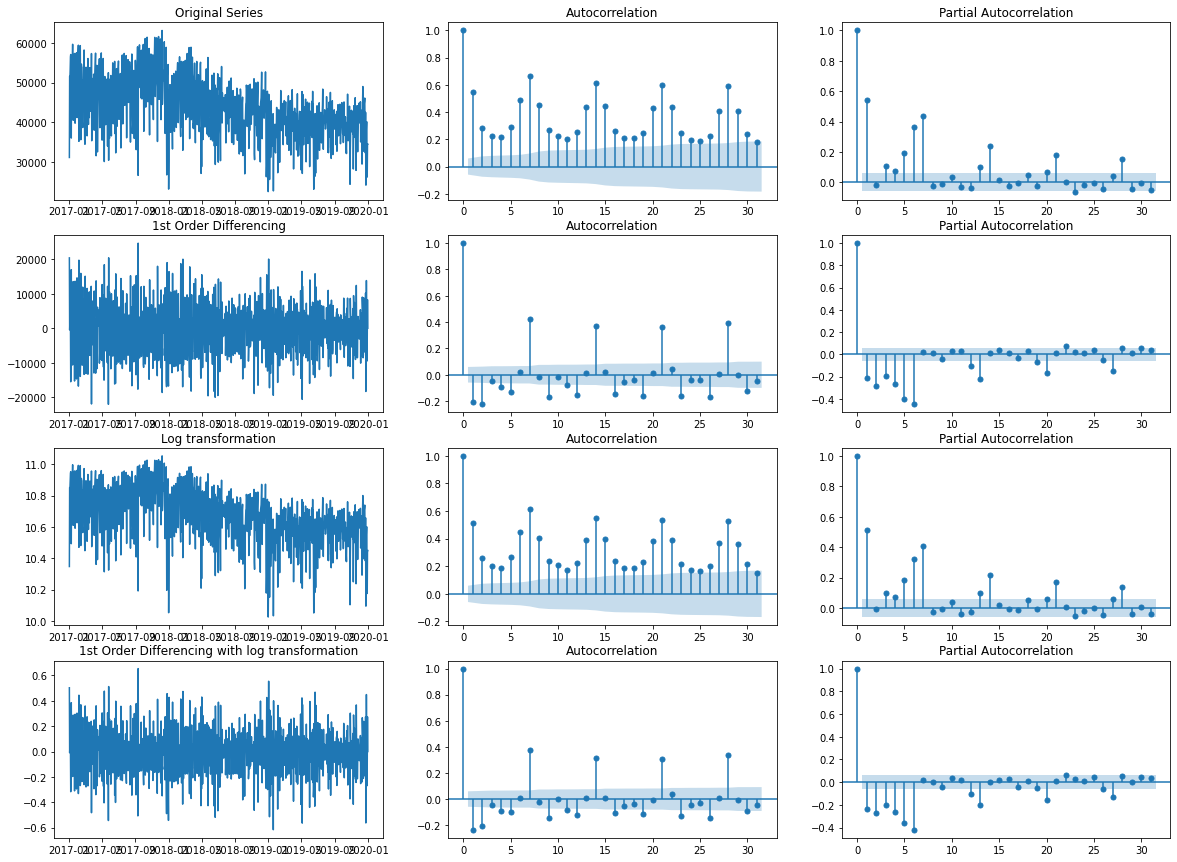

In [102]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(4,3, figsize=(20, 15))
#fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(diario); axes[0, 0].set_title('Original Series')
plot_acf(diario, ax=axes[0, 1])
plot_pacf(diario, ax=axes[0, 2])

axes[1, 0].plot(diario.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(diario.diff().dropna(), ax=axes[1, 1])
plot_pacf(diario.diff().dropna(), ax=axes[1, 2])


axes[2, 0].plot(np.log(diario)); axes[2, 0].set_title('Log transformation')
plot_acf(np.log(diario).dropna(), ax=axes[2, 1])
plot_pacf(np.log(diario).dropna(), ax=axes[2, 2])

axes[3, 0].plot(np.log(diario).diff()); axes[3, 0].set_title('1st Order Differencing with log transformation')
plot_acf(np.log(diario).diff().dropna(), ax=axes[3, 1])
plot_pacf(np.log(diario).diff().dropna(), ax=axes[3, 2])

plt.show()


Se observa una serie estacionaria para la primer diferencia y primer diferencia del logaritmo, con un comportamiento más estable para el segundo.  Respecto a los datos de autocorrelación y autocorrelación parcial, se observan valores represntativos de lags 1, 2 y 7 para la autocorrelación y de 1 a 6 para la autocorrelación parcial.

A continuación observaremos la misma gráfica para el caso de la serie semanal.

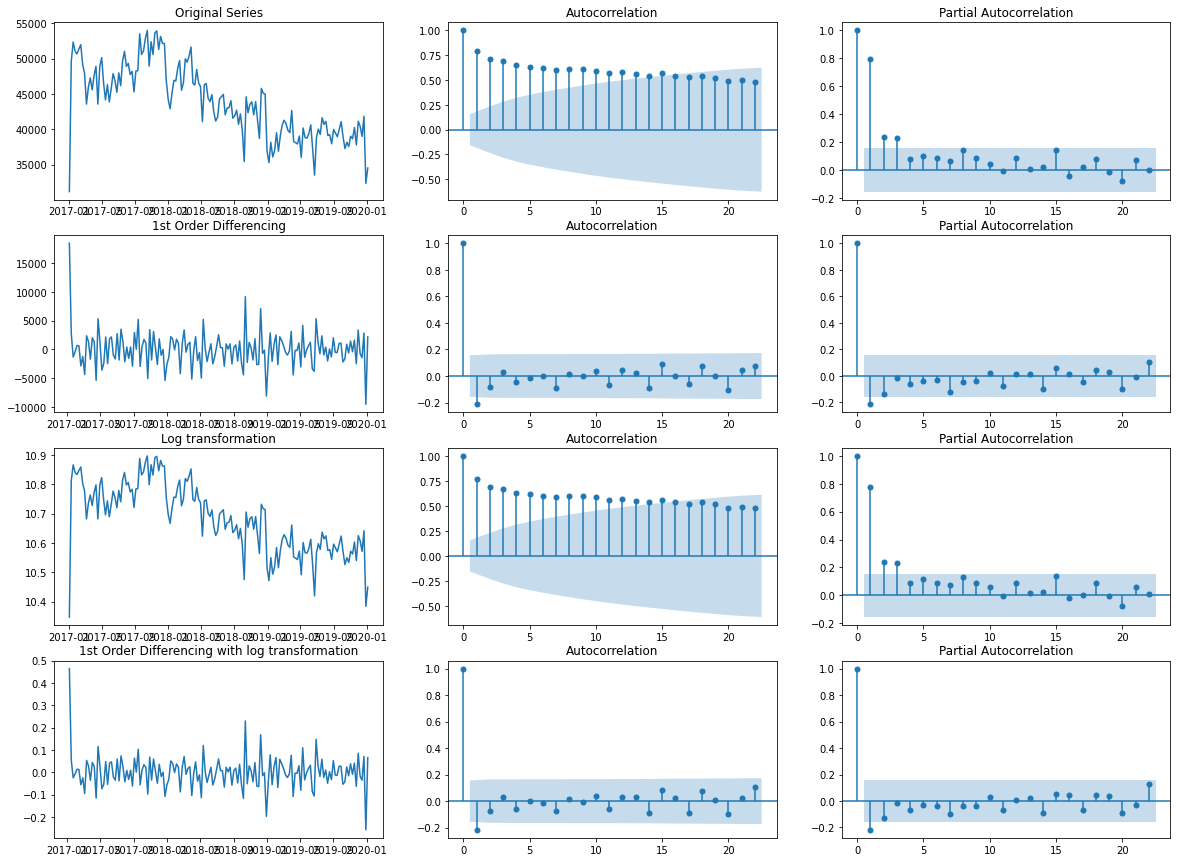

In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(4,3, figsize=(20, 15))
#fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(semanal); axes[0, 0].set_title('Original Series')
plot_acf(semanal, ax=axes[0, 1])
plot_pacf(semanal, ax=axes[0, 2])

axes[1, 0].plot(semanal.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(semanal.diff().dropna(), ax=axes[1, 1])
plot_pacf(semanal.diff().dropna(), ax=axes[1, 2])


axes[2, 0].plot(np.log(semanal)); axes[2, 0].set_title('Log transformation')
plot_acf(np.log(semanal).dropna(), ax=axes[2, 1])
plot_pacf(np.log(semanal).dropna(), ax=axes[2, 2])

axes[3, 0].plot(np.log(semanal).diff()); axes[3, 0].set_title('1st Order Differencing with log transformation')
plot_acf(np.log(semanal).diff().dropna(), ax=axes[3, 1])
plot_pacf(np.log(semanal).diff().dropna(), ax=axes[3, 2])

plt.show()

En el caso del dataset semanal, se observan comportamientos estacionarios tanto para la primer diferencia como para la primer diferencia del logaritmo.  En todos los casos, tanto para la autocorrelación como la autocorrelación parcial se observan lags representativos de 1.

In [104]:
#Crearemos las variables logarítmicas para utilizar en los modelos
logsemanal = np.log(semanal)
logdiario = np.log(diario)

### 3. Estimar los parámetros

In [105]:
from statsmodels.tsa.arima.model import ARIMA

In [106]:
#modelo manual diario
model_md = ARIMA(diario_train, order=(5,1,5))
model_md_fit = model_md.fit()
print(model_md_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         cantidad_pasos   No. Observations:                 1003
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9920.430
Date:                Tue, 05 Oct 2021   AIC                          19862.860
Time:                        22:36:01   BIC                          19916.867
Sample:                    01-01-2017   HQIC                         19883.384
                         - 09-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0723      0.038     28.441      0.000       0.998       1.146
ar.L2         -1.6528      0.030    -54.766      0.000      -1.712      -1.594
ar.L3          1.1745      0.053     22.194      0.0

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


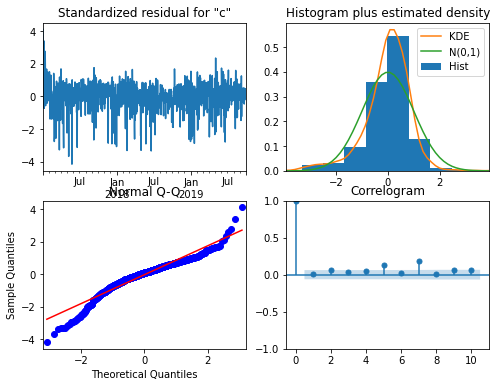

In [107]:
model_md_fit.plot_diagnostics(figsize=(8, 6))
plt.show()

In [108]:
#realizaremos la predicción
forecast = model_md_fit.forecast(steps=len(diario_test))
diario_test["Forecast_MD"] = forecast

<ipython-input-108-64013c12caaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario_test["Forecast_MD"] = forecast


In [109]:
#Realizamos el cálculo de los errores
rmse_MD = np.sqrt(mean_squared_error(diario_test.cantidad_pasos, diario_test.Forecast_MD))
mae_MD =  mean_absolute_error(diario_test.cantidad_pasos, diario_test.Forecast_MD)
mape_MD = np.mean(np.abs((diario_test.cantidad_pasos - diario_test.Forecast_MD) / diario_test.cantidad_pasos)) * 100

In [110]:
print("RMSE de modelo diario:", rmse_MD) #presentamos el RMSE del modelo manual diario
print("\nMAE de modelo diario:", mae_MD) #presentamos el MAE del modelo manual diario
print("\nMAPE de modelo diario:", mape_MD) #presentamos el MAPE del modelo manual diario

RMSE de modelo diario: 4893.085914489104

MAE de modelo diario: 3606.5163051493178

MAPE de modelo diario: 10.562437392148674


In [111]:
resultados = resultados.append(pd.DataFrame({'Modelo':['ARIMA MD'], 'RMSE':[rmse_MD], 'MAE':[mae_MD], 'MAPE':[mape_MD], 'MAPE vs Benchmark':[(mape_MD - resultados.MAPE[0])]}), ignore_index=True)

In [112]:
#modelo manual semanal
model_ms = ARIMA(semanal_train, order=(1,1,1))
model_ms_fit = model_ms.fit()
print(model_ms_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         cantidad_pasos   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1345.367
Date:                Tue, 05 Oct 2021   AIC                           2696.733
Time:                        22:36:02   BIC                           2705.622
Sample:                    01-01-2017   HQIC                          2700.345
                         - 09-29-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0512      0.644     -0.079      0.937      -1.314       1.212
ma.L1          0.1892      0.655      0.289      0.773      -1.095       1.474
sigma2       8.77e+06   2.34e-08   3.75e+14      0.0

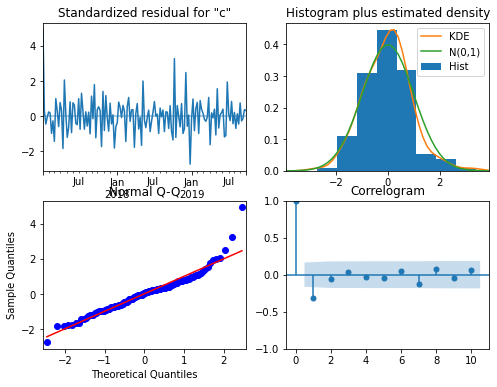

In [113]:
model_ms_fit.plot_diagnostics(figsize=(8, 6))
plt.show()

In [114]:
#realizaremos la predicción
forecast = model_ms_fit.forecast(steps=len(semanal_test))
semanal_test["Forecast_MS"] = forecast

<ipython-input-114-73dfa4bbbb62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semanal_test["Forecast_MS"] = forecast


In [115]:
#Realizamos el cálculo de los errores
rmse_ms = np.sqrt(mean_squared_error(semanal_test.cantidad_pasos, semanal_test.Forecast_MS))
mae_ms =  mean_absolute_error(semanal_test.cantidad_pasos, semanal_test.Forecast_MS)
mape_ms = np.mean(np.abs((semanal_test.cantidad_pasos - semanal_test.Forecast_MS) / semanal_test.cantidad_pasos)) * 100

In [116]:
print("RMSE de modelo semanal:", rmse_ms) #presentamos el RMSE del modelo manual semanal
print("\nMAE de modelo semanal:", mae_ms) #presentamos el MAE del modelo manual semanal
print("\nMAPE de modelo semanal:", mape_ms) #presentamos el MAPE del modelo manual semanal

RMSE de modelo semanal: 3409.352485397185

MAE de modelo semanal: 2653.638495038389

MAPE de modelo semanal: 7.246964370702455


In [117]:
resultados = resultados.append(pd.DataFrame({'Modelo':['ARIMA MS'], 'RMSE':[rmse_ms], 'MAE':[mae_ms], 'MAPE':[mape_ms], 'MAPE vs Benchmark':[(mape_ms - resultados.MAPE[0])]}), ignore_index=True)

#### Optimización de parámetros Auto ARIMAX
A continuación probaremos Auto ARIMAX para comparar el modelo obtenido contra los armados manualmente.

In [118]:
from pmdarima import auto_arima

In [119]:
model_ad = auto_arima(diario_train.cantidad_pasos, trace=True, error_action="ignore", suppress_warnings=True)
model_ad.fit(diario_train.cantidad_pasos)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20188.865, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20620.612, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20584.744, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20359.195, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20618.613, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20233.601, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20238.272, Time=0.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20248.283, Time=1.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=20021.578, Time=1.67 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=20214.826, Time=0.92 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=20026.000, Time=1.84 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=20202.710, Time=1.39 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=20010.974, Time=2.27 sec
 ARIMA(4,1,4)(0,0,0)[0] i

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [120]:
forecast = model_ad.predict(n_periods=len(diario_test))
diario_test["Forecast_ARIMAX"] = forecast

<ipython-input-120-16ac167feead>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario_test["Forecast_ARIMAX"] = forecast


In [121]:
#Realizamos el cálculo de los errores
rmse_ad = np.sqrt(mean_squared_error(diario_test.cantidad_pasos, diario_test.Forecast_ARIMAX))
mae_ad =  mean_absolute_error(diario_test.cantidad_pasos, diario_test.Forecast_ARIMAX)
mape_ad = np.mean(np.abs((diario_test.cantidad_pasos - diario_test.Forecast_ARIMAX) / diario_test.cantidad_pasos)) * 100

In [122]:
print("RMSE de modelo AUTOARIMA diario:", rmse_ad) #presentamos el RMSE del modelo AUTOARIMA diario
print("\nMAE de modelo AUTOARIMA diario:", mae_ad) #presentamos el MAE del modelo AUTOARIMA diario
print("\nMAPE de modelo AUTOARIMA diario:", mape_ad) #presentamos el MAPE del modelo AUTOARIMA diario

RMSE de modelo AUTOARIMA diario: 4893.085914489104

MAE de modelo AUTOARIMA diario: 3606.5163051493178

MAPE de modelo AUTOARIMA diario: 10.562437392148674


In [123]:
resultados = resultados.append(pd.DataFrame({'Modelo':['AUTOARIMA-D'], 'RMSE':[rmse_ad], 'MAE':[mae_ad], 'MAPE':[mape_ad], 'MAPE vs Benchmark':[(mape_ad - resultados.MAPE[0])]}), ignore_index=True)

## Semanal

### Optimización de parámetros
Utilizaremos Auto ARIMA para el dataset semanal.

In [124]:
model_as = auto_arima(semanal_train.cantidad_pasos, trace=True, error_action="ignore", suppress_warnings=True)
model_as.fit(semanal_train.cantidad_pasos)

forecast = model_as.predict(n_periods=len(semanal_test))
semanal_test["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2700.003, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2699.182, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2696.872, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2696.847, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2697.262, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2698.949, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2700.729, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2694.743, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2696.733, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2696.735, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2694.859, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.704 seconds


<ipython-input-124-a8054b83d251>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semanal_test["Forecast_ARIMAX"] = forecast


In [125]:
#Realizamos el cálculo de los errores
rmse_as = np.sqrt(mean_squared_error(semanal_test.cantidad_pasos, semanal_test.Forecast_ARIMAX))
mae_as =  mean_absolute_error(semanal_test.cantidad_pasos, semanal_test.Forecast_ARIMAX)
mape_as = np.mean(np.abs((semanal_test.cantidad_pasos - semanal_test.Forecast_ARIMAX) / semanal_test.cantidad_pasos)) * 100

In [126]:
print("RMSE de modelo Autoarima Semanal:", rmse_as) #presentamos el RMSE del modelo manual semanal
print("\nMAE de modelo Autoarima Semanal:", mae_as) #presentamos el MAE del modelo manual semanal
print("\nMAPE de modelo Autoarima Semanal:", mape_as) #presentamos el MAPE del modelo manual semanal

RMSE de modelo Autoarima Semanal: 3420.4838966075563

MAE de modelo Autoarima Semanal: 2666.0734881040303

MAPE de modelo Autoarima Semanal: 7.279764907463915


In [127]:
resultados = resultados.append(pd.DataFrame({'Modelo':['AUTOARIMA-S'], 'RMSE':[rmse_as], 'MAE':[mae_as], 'MAPE':[mape_as], 'MAPE vs Benchmark':[(mape_as - resultados.MAPE[0])]}), ignore_index=True)

## Gráficas

A continuación presentamos los gráficos de las series diaria y semanal contra las predicciones de los modelos ARIMA (manual) y AUTOARIMA

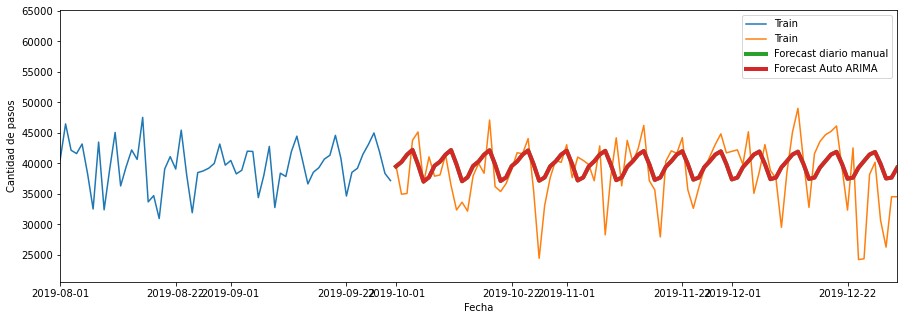

In [128]:
plt.figure(figsize = (15,5))
plt.plot(diario_train.index, diario_train.cantidad_pasos, label = 'Train')
plt.plot(diario_test.index, diario_test.cantidad_pasos, label = 'Train')
plt.plot(diario_test.index, diario_test.Forecast_MD , lw = 4, label = 'Forecast diario manual')
plt.plot(diario_test.index, diario_test.Forecast_ARIMAX , lw = 4, label = 'Forecast Auto ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.axis(xmin='2019-08-01', xmax='2019-12-31')
plt.legend()
plt.show()

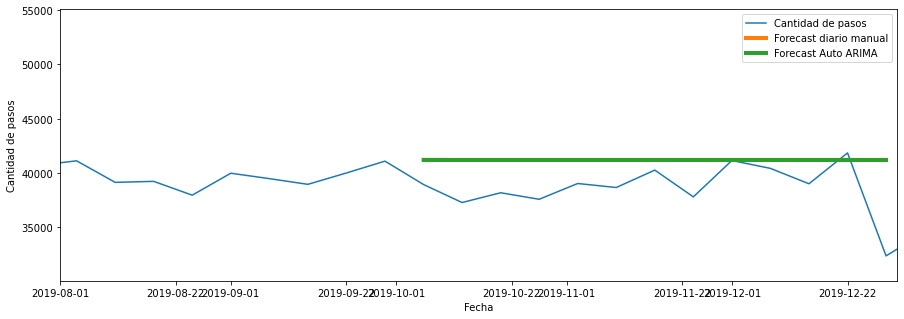

In [129]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(semanal_test.index, semanal_test.Forecast_MS , lw = 4, label = 'Forecast diario manual')
plt.plot(semanal_test.index, semanal_test.Forecast_ARIMAX , lw = 4, label = 'Forecast Auto ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.axis(xmin='2019-08-01', xmax='2019-12-31')
plt.legend()
plt.show()

Se observa en el modelo semanal que este no copia en la predicción *out of sample* el comportamiento de la cuvra. 

In [130]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [131]:
model_smd = SARIMAX(diario_train, order=(1,1,1), seasonal_order=(0,1,1,7))#, freq = 'D')
model_fit_smd = model_smd.fit()
print(model_fit_smd.summary())

                                     SARIMAX Results                                     
Dep. Variable:                    cantidad_pasos   No. Observations:                 1003
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -9842.790
Date:                           Tue, 05 Oct 2021   AIC                          19693.580
Time:                                   22:36:48   BIC                          19713.191
Sample:                               01-01-2017   HQIC                         19701.035
                                    - 09-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1811      0.041      4.434      0.000       0.101       0.261
ma.L1         -0.7879      0.028    -27.748

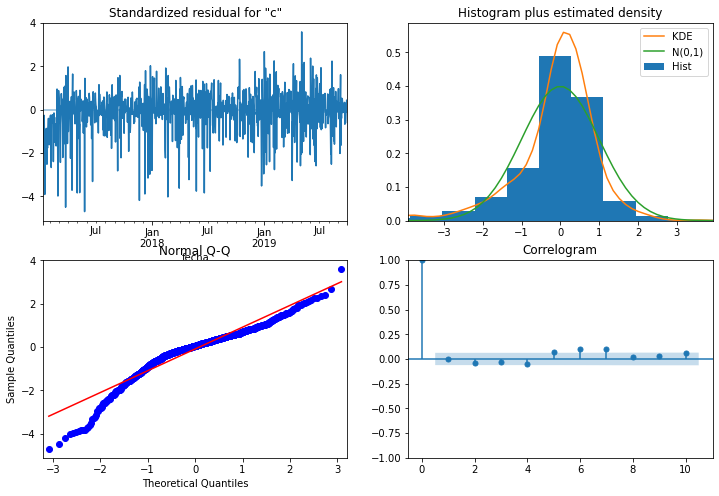

In [132]:
model_fit_smd.plot_diagnostics(figsize=(12, 8))
plt.show()

In [133]:
forecast = model_fit_smd.forecast(steps=len(diario_test))
diario_test["Forecast_SARIMA"] = forecast

<ipython-input-133-4ec66a76c813>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario_test["Forecast_SARIMA"] = forecast


In [134]:
#Realizamos el cálculo de los errores
rmse_smd = np.sqrt(mean_squared_error(diario_test.cantidad_pasos, diario_test.Forecast_SARIMA))
mae_smd =  mean_absolute_error(diario_test.cantidad_pasos, diario_test.Forecast_SARIMA)
mape_smd = np.mean(np.abs((diario_test.cantidad_pasos - diario_test.Forecast_SARIMA) / diario_test.cantidad_pasos)) * 100

In [135]:
print("RMSE de modelo SARIMA diario:", rmse_smd) #presentamos el RMSE del modelo SARIMA diario
print("\nMAE de modelo SARIMA diario:", mae_smd) #presentamos el MAE del modelo SARIMA diario
print("\nMAPE de modelo SARIMA diario:", mape_smd) #presentamos el MAPE del modelo SARIMA diario

RMSE de modelo SARIMA diario: 5270.640192163148

MAE de modelo SARIMA diario: 3763.190189279453

MAPE de modelo SARIMA diario: 11.303601222154084


In [136]:
resultados = resultados.append(pd.DataFrame({'Modelo':['SARIMA-MD'], 'RMSE':[rmse_smd], 'MAE':[mae_smd], 'MAPE':[mape_smd], 'MAPE vs Benchmark':[(mape_smd - resultados.MAPE[0])]}), ignore_index=True)

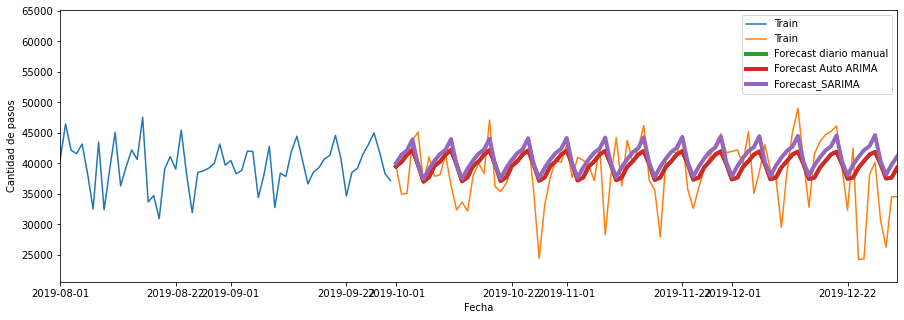

In [137]:
plt.figure(figsize = (15,5))
plt.plot(diario_train.index, diario_train.cantidad_pasos, label = 'Train')
plt.plot(diario_test.index, diario_test.cantidad_pasos, label = 'Train')
plt.plot(diario_test.index, diario_test.Forecast_MD , lw = 4, label = 'Forecast diario manual')
plt.plot(diario_test.index, diario_test.Forecast_ARIMAX , lw = 4, label = 'Forecast Auto ARIMA')
plt.plot(diario_test.index, diario_test.Forecast_SARIMA , lw = 4, label = 'Forecast_SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.axis(xmin='2019-08-01', xmax='2019-12-31')
plt.legend()
plt.show()

### SARIMA semanal

A continuación probaremos un modelo sarima semanal

In [138]:
model_sms = SARIMAX(semanal_train, order=(0,1,0), seasonal_order=(0,1,1,52))
model_fit_sms = model_sms.fit()
print(model_fit_sms.summary())

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                       cantidad_pasos   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -872.774
Date:                              Tue, 05 Oct 2021   AIC                           1749.547
Time:                                      22:36:51   BIC                           1754.569
Sample:                                  01-01-2017   HQIC                          1751.573
                                       - 09-29-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L52      -0.5064      0.079     -6.396      0.000      -0.662      -0.351
sigma2      1.523e+

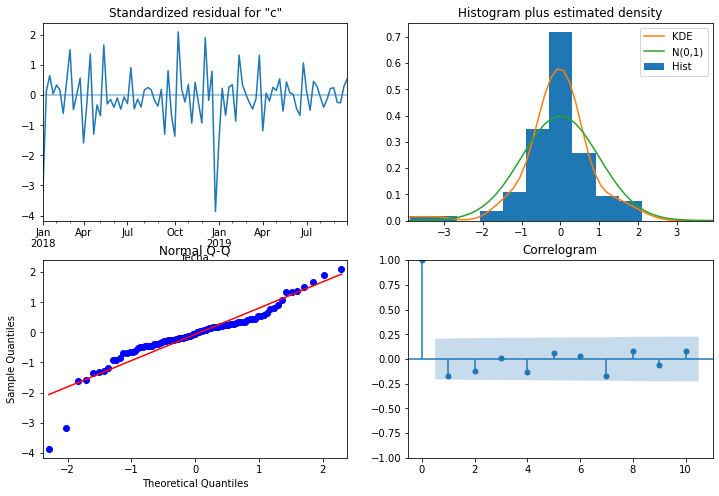

In [139]:
model_fit_sms.plot_diagnostics(figsize=(12, 8))
plt.show()

In [140]:
forecast = model_fit_sms.forecast(steps=len(semanal_test))
semanal_test["Forecast_SARIMA"] = forecast

<ipython-input-140-4005d237d3cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semanal_test["Forecast_SARIMA"] = forecast


In [141]:
#Realizamos el cálculo de los errores
rmse_sms = np.sqrt(mean_squared_error(semanal_test.cantidad_pasos, semanal_test.Forecast_SARIMA))
mae_sms =  mean_absolute_error(semanal_test.cantidad_pasos, semanal_test.Forecast_SARIMA)
mape_sms = np.mean(np.abs((semanal_test.cantidad_pasos - semanal_test.Forecast_SARIMA) / semanal_test.cantidad_pasos)) * 100

In [142]:
print("RMSE de modelo SARIMA Semanal:", rmse_sms) #presentamos el RMSE del modelo SARIMA semanal
print("\nMAE de modelo SARIMA Semanal:", mae_sms) #presentamos el MAE del modelo SARIMA semanal
print("\nMAPE de modelo SARIMA Semanal:", mape_sms) #presentamos el MAPE del modelo SARIMA semanal

RMSE de modelo SARIMA Semanal: 4818.928418537312

MAE de modelo SARIMA Semanal: 4065.4928732587828

MAPE de modelo SARIMA Semanal: 10.91510348029999


In [143]:
resultados = resultados.append(pd.DataFrame({'Modelo':['SARIMA MS'], 'RMSE':[rmse_sms], 'MAE':[mae_sms], 'MAPE':[mape_sms], 'MAPE vs Benchmark':[(mape_sms - resultados.MAPE[0])]}), ignore_index=True)

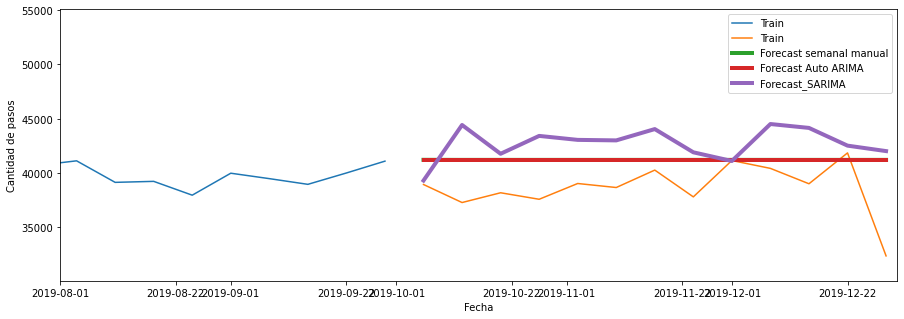

In [144]:
plt.figure(figsize = (15,5))
plt.plot(semanal_train.index, semanal_train.cantidad_pasos, label = 'Train')
plt.plot(semanal_test.index, semanal_test.cantidad_pasos, label = 'Train')
plt.plot(semanal_test.index, semanal_test.Forecast_MS , lw = 4, label = 'Forecast semanal manual')
plt.plot(semanal_test.index, semanal_test.Forecast_ARIMAX , lw = 4, label = 'Forecast Auto ARIMA')
plt.plot(semanal_test.index, semanal_test.Forecast_SARIMA , lw = 4, label = 'Forecast_SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.axis(xmin='2019-08-01', xmax='2019-12-31')
plt.legend()
plt.show()

## Machine learning

A continuación aplicaremos herramientas de machine learning para predecir el comportamiento de la variable tráfico.

En primer lugar, vamos a definir la variable "look back", que como su nombre lo indica, significa "mirar hacia atrás", es decir, cuántos períodos anteriores utilizaremos para predecir el período siguiente.

In [145]:
look_back_s = 52 # para la ventana semanal usamos un año de datos para predecir el valor siguiente
look_back_d = 60 # para la ventana diaria utilizaremos 2 meses para predecir el valor siguiente

Creamos los `X` e `y` con ceros para luego llenar con los datos. Notar los `shape`

Comenzamos con el set de datos de ventana diaria

In [146]:
senial_d = diario.cantidad_pasos
senial_d

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2019-12-27    40182.0
2019-12-28    30681.0
2019-12-29    26259.0
2019-12-30    34523.0
2019-12-31    34523.0
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

In [147]:
N = senial_d.shape[0]
X = np.zeros((N - look_back_d,look_back_d))
y = np.zeros(N - look_back_d)
print(X.shape, y.shape)

(1035, 60) (1035,)


In [148]:
X[1,:] = senial_d.iloc[1:1+look_back_d]

Llenamos los `X` e `y`

In [149]:
for i in range(X.shape[0]):
    X[i,:] = senial_d.iloc[i:i+look_back_d]
    y[i] = senial_d.iloc[i+look_back_d]

Realizamos el train test split

In [150]:
N_train = 1003 - look_back_d # cantidad de instancias que vamos a usar para entrenar. 
N_test = 92 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back_d

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(943, 60) (943,)
(92, 60) (92,)


Entrenamos

In [151]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

Graficamos la importancia de cada feature.

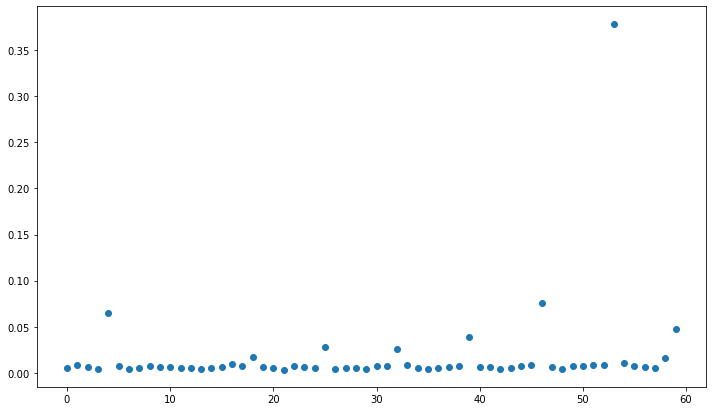

In [152]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
plt.show()

El modelo de Random Forest permite observar cuáles son los principales predictores.  En este caso se observan los días 1, 2, 7 y múltiplos de 7 (14, 21, etc.) de forma decreciente.  Esto puede asociarse a una estacionalidad semanal.

In [153]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

A continuación graficamos la serie original comparada con la correspondiente a la serie predicha

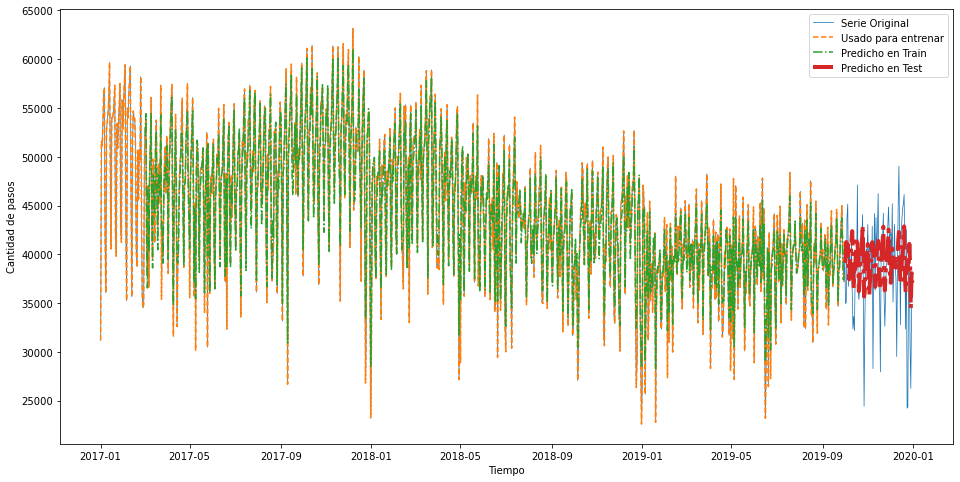

In [154]:
plt.figure(figsize=(16,8))
plt.plot(senial_d.index[:length_total], senial_d[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_d.index[:N_train + look_back_d], senial_d[:N_train + look_back_d],'--', label = 'Usado para entrenar')
plt.plot(senial_d.index[look_back_d: look_back_d + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial_d.index[N_train+look_back_d: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Observamos más de cerca la el segmento de test

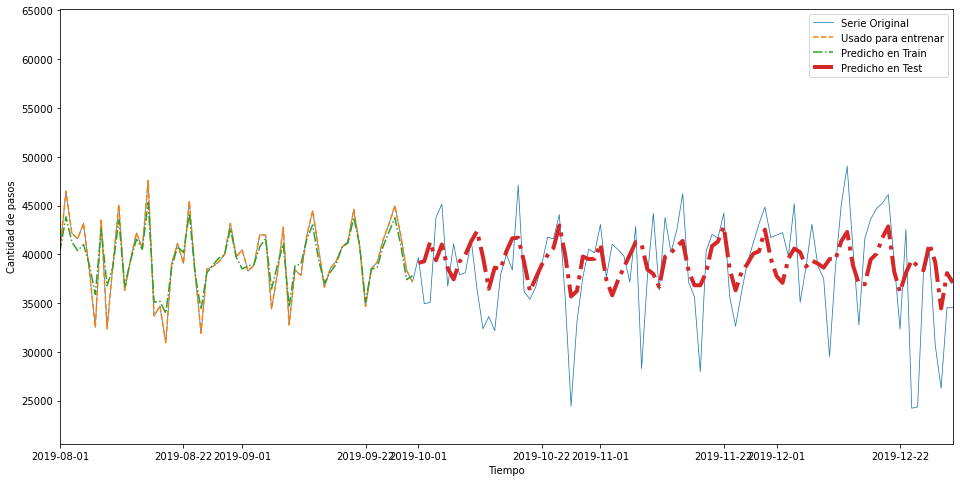

In [155]:
plt.figure(figsize=(16,8))
plt.plot(senial_d.index[:length_total], senial_d[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_d.index[:N_train + look_back_d], senial_d[:N_train + look_back_d],'--', label = 'Usado para entrenar')
plt.plot(senial_d.index[look_back_d: look_back_d + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial_d.index[N_train+look_back_d: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.axis(xmin='2019-08-01', xmax='2019-12-31')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [156]:
diario_test["Forecast_RFD"] = y_test_pred

<ipython-input-156-fea3f815774c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario_test["Forecast_RFD"] = y_test_pred


In [157]:
#Realizamos el cálculo de los errores
rmse_rfd = np.sqrt(mean_squared_error(diario_test.cantidad_pasos, diario_test.Forecast_RFD))
mae_rfd =  mean_absolute_error(diario_test.cantidad_pasos, diario_test.Forecast_RFD)
mape_rfd = np.mean(np.abs((diario_test.cantidad_pasos - diario_test.Forecast_RFD) / diario_test.cantidad_pasos)) * 100

In [158]:
print("RMSE de modelo Random Forest diario:", rmse_rfd) #presentamos el RMSE del modelo Random Forest diario
print("\nMAE de modelo Random Forest diario:", mae_rfd) #presentamos el MAE del modelo Random Forest diario
print("\nMAPE de modelo Random Forest diario:", mape_rfd) #presentamos el MAPE del modelo Random Forest diario

RMSE de modelo Random Forest diario: 4555.531267793885

MAE de modelo Random Forest diario: 3334.741929347826

MAPE de modelo Random Forest diario: 9.690736356879384


In [159]:
resultados = resultados.append(pd.DataFrame({'Modelo':['RF-D'], 'RMSE':[rmse_rfd], 'MAE':[mae_rfd], 'MAPE':[mape_rfd], 'MAPE vs Benchmark':[(mape_rfd - resultados.MAPE[0])]}), ignore_index=True)

In [160]:
senial_s = semanal.cantidad_pasos

In [161]:
N = senial_s.shape[0]
X = np.zeros((N - look_back_s,look_back_s))
y = np.zeros(N - look_back_s)
print(X.shape, y.shape)

(106, 52) (106,)


In [162]:
X[1,:] = senial_s.iloc[1:1+look_back_s]

Llenamos los `X` e `y`

In [163]:
for i in range(X.shape[0]):
    X[i,:] = senial_s.iloc[i:i+look_back_s]
    y[i] = senial_s.iloc[i+look_back_s]

Realizamos el train test split

In [164]:
N_train = 145 - look_back_s # cantidad de instancias que vamos a usar para entrenar. 
N_test = 13 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back_s

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(93, 52) (93,)
(13, 52) (13,)


Entrenamos

In [165]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

Graficamos la importancia de cada feature.

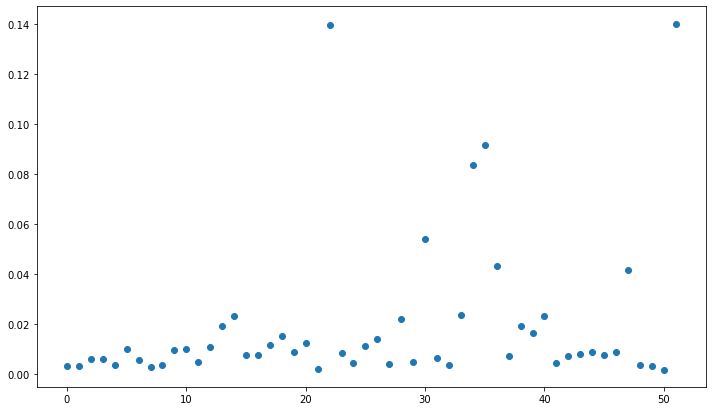

In [166]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
plt.show()

Para el caso semanal, el modelo de Random Forest utiliza como principales predictores la 4ta semana, y semanas de 14 a 18.  No se obseva una estacionalidad tan clara como en el caso diario.

In [167]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

A continuación graficamos la serie original comparada con la correspondiente a la serie predicha

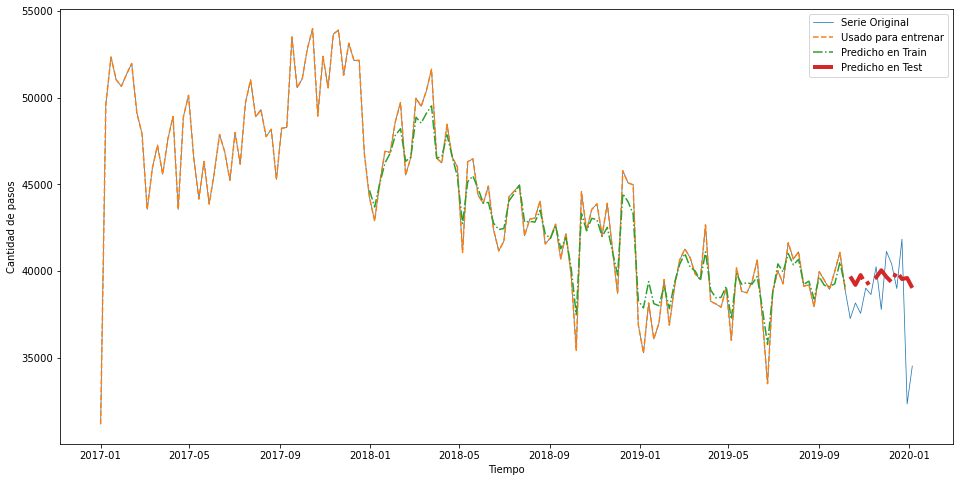

In [168]:
plt.figure(figsize=(16,8))
plt.plot(senial_s.index[:length_total], senial_s[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_s.index[:N_train + look_back_s], senial_s[:N_train + look_back_s],'--', label = 'Usado para entrenar')
plt.plot(senial_s.index[look_back_s: look_back_s + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial_s.index[N_train+look_back_s: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Observamos más de cerca la el segmento de test

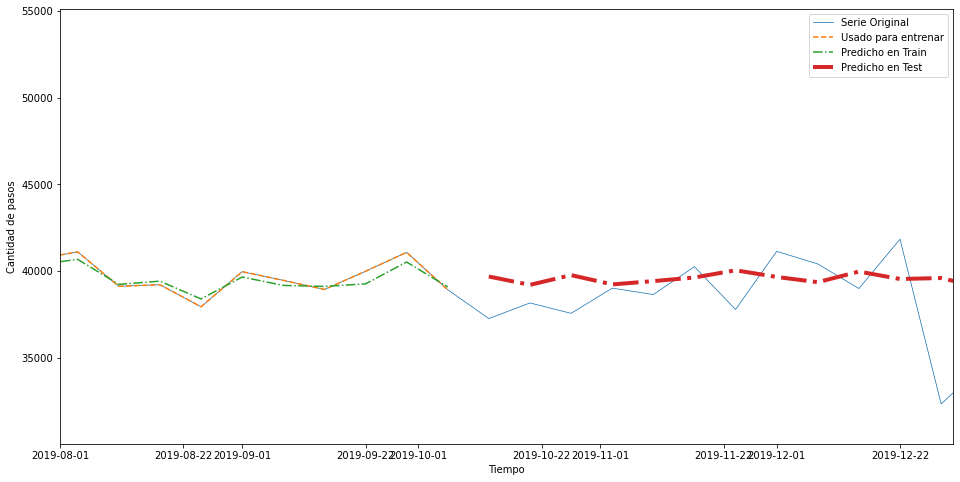

In [169]:
plt.figure(figsize=(16,8))
plt.plot(senial_s.index[:length_total], senial_s[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_s.index[:N_train + look_back_s], senial_s[:N_train + look_back_s],'--', label = 'Usado para entrenar')
plt.plot(senial_s.index[look_back_s: look_back_s + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial_s.index[N_train+look_back_s: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.axis(xmin='2019-08-01', xmax='2019-12-31')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [170]:
semanal_test["Forecast_RFS"] = y_test_pred

<ipython-input-170-ca916bd995a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semanal_test["Forecast_RFS"] = y_test_pred


In [171]:
#Realizamos el cálculo de los errores
rmse_rfs = np.sqrt(mean_squared_error(semanal_test.cantidad_pasos, semanal_test.Forecast_RFS))
mae_rfs =  mean_absolute_error(semanal_test.cantidad_pasos, semanal_test.Forecast_RFS)
mape_rfs = np.mean(np.abs((semanal_test.cantidad_pasos - semanal_test.Forecast_RFS) / semanal_test.cantidad_pasos)) * 100

In [172]:
print("RMSE de modelo Random Forest semanal:", rmse_rfs) #presentamos el RMSE del modelo Random Forest semanal
print("\nMAE de modelo Random Forest semanal:", mae_rfs) #presentamos el MAE del modelo Random Forest semanal
print("\nMAPE de modelo Random Forest semanal:", mape_rfs) #presentamos el MAPE del modelo Random Forest semanal

RMSE de modelo Random Forest semanal: 2284.620867588029

MAE de modelo Random Forest semanal: 1626.7660989010888

MAPE de modelo Random Forest semanal: 4.441716396938978


In [173]:
resultados = resultados.append(pd.DataFrame({'Modelo':['RF-S'], 'RMSE':[rmse_rfs], 'MAE':[mae_rfs], 'MAPE':[mape_rfs], 'MAPE vs Benchmark':[(mape_rfs - resultados.MAPE[0])]}), ignore_index=True)

In [174]:
import xgboost as xgb

In [175]:
xgb_reg = xgb.XGBRegressor()

In [176]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
y_pred = xgb_reg.predict(X)
y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

A continuación graficamos la serie original comparada con la correspondiente a la serie predicha

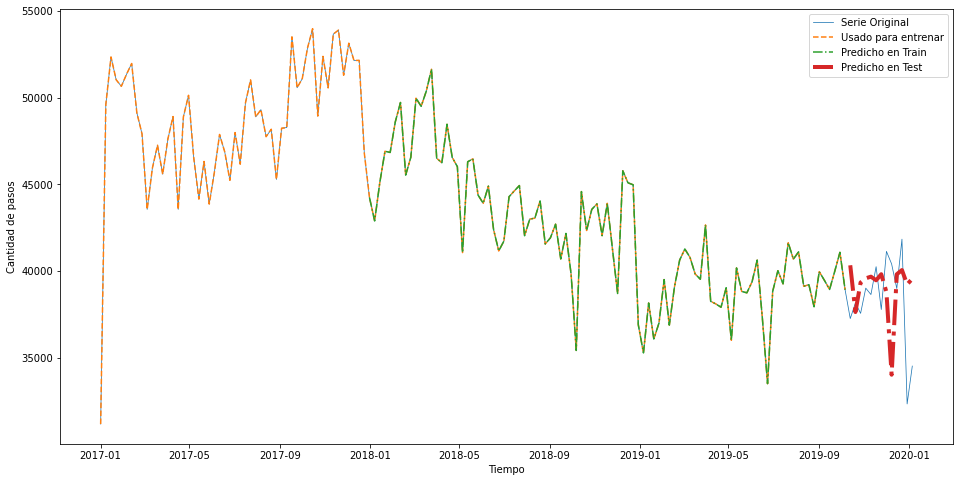

In [178]:
plt.figure(figsize=(16,8))
plt.plot(senial_s.index[:length_total], senial_s[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_s.index[:N_train + look_back_s], senial_s[:N_train + look_back_s],'--', label = 'Usado para entrenar')
plt.plot(senial_s.index[look_back_s: look_back_s + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial_s.index[N_train+look_back_s: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Observamos más de cerca la el segmento de test

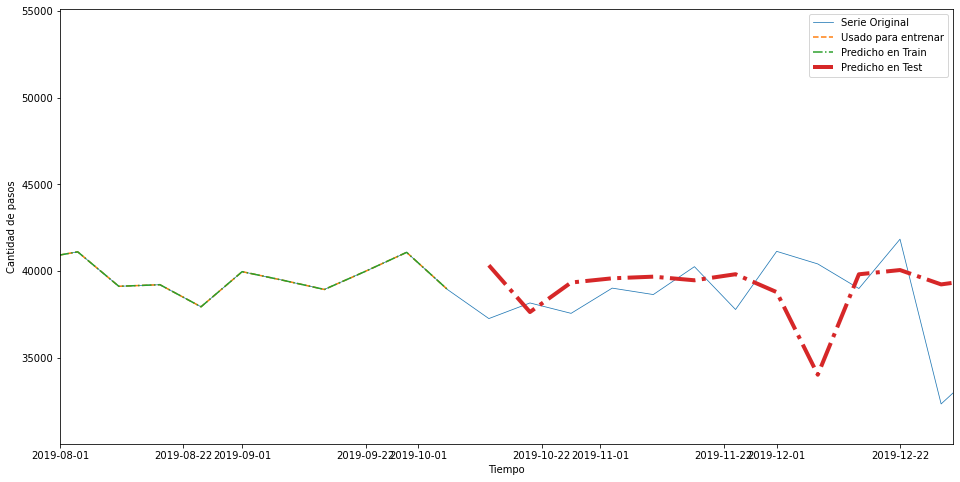

In [179]:
plt.figure(figsize=(16,8))
plt.plot(senial_s.index[:length_total], senial_s[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_s.index[:N_train + look_back_s], senial_s[:N_train + look_back_s],'--', label = 'Usado para entrenar')
plt.plot(senial_s.index[look_back_s: look_back_s + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial_s.index[N_train+look_back_s: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.axis(xmin='2019-08-01', xmax='2019-12-31')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [180]:
semanal_test["Forecast_XGBS"] = y_test_pred

<ipython-input-180-83247b6d4b5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semanal_test["Forecast_XGBS"] = y_test_pred


In [181]:
#Realizamos el cálculo de los errores
rmse_xgbs = np.sqrt(mean_squared_error(semanal_test.cantidad_pasos, semanal_test.Forecast_XGBS))
mae_xgbs =  mean_absolute_error(semanal_test.cantidad_pasos, semanal_test.Forecast_XGBS)
mape_xgbs = np.mean(np.abs((semanal_test.cantidad_pasos - semanal_test.Forecast_XGBS) / semanal_test.cantidad_pasos)) * 100

In [182]:
print("RMSE de modelo XGBoost semanal:", rmse_xgbs) #presentamos el RMSE del modelo XGBoost semanal
print("\nMAE de modelo XGBoost semanal:", mae_xgbs) #presentamos el MAE del modelo XGBoost semanal
print("\nMAPE de modelo XGBoost semanal:", mape_xgbs) #presentamos el MAPE del modelo XGBoost semanal

RMSE de modelo XGBoost semanal: 3048.579254707518

MAE de modelo XGBoost semanal: 2038.6691706730758

MAPE de modelo XGBoost semanal: 5.437765559425622


In [183]:
resultados = resultados.append(pd.DataFrame({'Modelo':['XGB-S'], 'RMSE':[rmse_xgbs], 'MAE':[mae_xgbs], 'MAPE':[mape_xgbs], 'MAPE vs Benchmark':[(mape_xgbs - resultados.MAPE[0])]}), ignore_index=True)

## Resultados
A continuación presentamos los resultados de los modelos utilizados

In [184]:
resultados

Modelo         RMSE          MAE       MAPE MAPE vs Benchmark
0  Benchmark_LR  5323.062542  4292.709168  11.687855               NaN
1      ARIMA MD  4893.085914  3606.516305  10.562437          -1.12542
2      ARIMA MS  3409.352485  2653.638495   7.246964          -4.44089
3   AUTOARIMA-D  4893.085914  3606.516305  10.562437          -1.12542
4   AUTOARIMA-S  3420.483897  2666.073488   7.279765          -4.40809
5     SARIMA-MD  5270.640192  3763.190189  11.303601         -0.384254
6     SARIMA MS  4818.928419  4065.492873  10.915103         -0.772751
7          RF-D  4555.531268  3334.741929   9.690736          -1.99712
8          RF-S  2284.620868  1626.766099   4.441716          -7.24614
9         XGB-S  3048.579255  2038.669171   5.437766          -6.25009

### Análisis de los resultados
Se puede observar a partir de la tabla de resultados que los modelos semanales presentan un error menor a los modelos diarios.  Sin embargo, parte de esto se explica porque los datos semanales ya son en si una agrupación de los valores diarios, con una menor variación y a su vez, representando menor cantidad de datos.

Los modelos diarios se basan en datos más dispersos, lo cual resulta más dificil de ajustar por parte de un modelo.  Si bien se observa en los datos una estacionalidad semanal, existen múltiples factores que, de cierta manera, afectan a dichos valores resultando en datos dispersos sin una estacionalidad marcada.  A su vez la presencia de factores externos con un fuerte impacto, como ser días festivos, paros o cortes, períodos vacacionales u otros, imprimen una variación adicional que no responde a la estacionalidad semanal y resulta dificil de poder predecir sin contar con variables adicionales que puedan aportar esta información al modelo.

### *Métrica utilizada*
Para comparar los modelos utilizaremos la métrica *MAPE* (Error absoluto porcentual promedio por sus siglas en inglés).  El principal beneficio del MAPE es que nos brinda a simple vista un valor del error relativo a los valores de la serie, de manera que es posible comparar diferentes modelos.  Es deseable que dicho error se acerque a 0, considerándose modelos aceptables con MAPE del orden del 5%-10%, dependiendo de la naturaleza de la serie analizada.

Teniendo en cuenta lo anterior, de los modelos presentados, se selecciona el modelo *Random Forest Semanal*, ya que presenta el menor valor de MAPE.  Sin embargo, se debe tener en cuenta que este tipo de herramientas no suelen ser las más adecuadas para trabajar con series de tiempo ya que estaremos manejando un volumen elevado de variables, resultando considerablemente más simples los modelos de ARIMA/SARIMA.

### Siguientes pasos
A continuación probaremos el comportmiento del modelo seleccionado frente a los siguientes escenarios.
1. Predecir el año 2020
1. Agregar datos históricos adicionales

## Predicción 2020

Se utilizará para entrenar todo el set de datos *diario* con los datos hasta diciembre 2019

Incorporamos los datos de 2020

In [185]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [186]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

In [187]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

In [188]:
data_2020.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  \
0                          Efectivo     Centro            24.0   
1                          Efectivo  Provincia            80.0   
2                Paso en Infracción  Provincia             1.0   
3  Paso en infracción con Multa LPR     Centro             1.0   
4  Paso en infracción con Multa LPR  Provincia             1.0   

               fecha2  
0 2020-01-01 01:00:00  
1 2020-01-01 01:00:00  
2 2020-01-01 01:00:00  
3 2020-01-01 01:00:00  
4 2020-01-01 01:00:00

In [189]:
data_2020 = data_2020[(data_2020.estacion == 'ILLIA')&(data_2020.forma_pago == 'Efectivo')]

Realizamos el resampleo diario.

In [190]:
#Realizamos el resampleo semanal sumando la cantidad de vehículos
diario_2020 = data_2020.resample('D', on = 'fecha2').sum()
diario_2020.head()

periodo  dia_fecha  hora_inicio  hora_fin  cantidad_pasos
fecha2                                                                
2020-01-01  371680.0      184.0       2122.0    2138.0         21395.0
2020-01-02  412080.0      408.0       2346.0    2406.0         33722.0
2020-01-03  416120.0      618.0       2402.0    2440.0         37067.0
2020-01-04  416120.0      824.0       2447.0    2485.0         30627.0
2020-01-05  438340.0     1085.0       2564.0    2613.0         27812.0

In [191]:
diario_2020.isna().sum()

periodo           0
dia_fecha         0
hora_inicio       0
hora_fin          0
cantidad_pasos    0
dtype: int64

In [192]:
#descartamos las columnas innecesarias en esta etapa
diario_2020.drop(columns = ['periodo','dia_fecha','hora_inicio','hora_fin'], inplace = True)
diario_2020.head()

cantidad_pasos
fecha2                    
2020-01-01         21395.0
2020-01-02         33722.0
2020-01-03         37067.0
2020-01-04         30627.0
2020-01-05         27812.0

In [193]:
#Realizamos el resampleo semanal sumando la cantidad de vehículos
#diario_2020b = data_2020.resample('D', on = 'fecha2').sum()
semanal_2020 = diario_2020.resample('W').mean()

In [194]:
semanal_total = pd.concat([semanal, semanal_2020])

In [195]:
senial_st = semanal_total.cantidad_pasos

In [196]:
N = senial_st.shape[0]
X = np.zeros((N - look_back_s,look_back_s))
y = np.zeros(N - look_back_s)
print(X.shape, y.shape)

(159, 52) (159,)


In [197]:
X[1,:] = senial_st.iloc[1:1+look_back_s]

Llenamos los `X` e `y`

In [198]:
for i in range(X.shape[0]):
    X[i,:] = senial_st.iloc[i:i+look_back_s]
    y[i] = senial_st.iloc[i+look_back_s]

In [199]:
senial_st

2017-01-01    31183.000000
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
                  ...     
2020-12-06     9797.142857
2020-12-13     9347.857143
2020-12-20    10511.142857
2020-12-27     9633.428571
2021-01-03    10356.750000
Name: cantidad_pasos, Length: 211, dtype: float64

Realizamos el train test split

In [200]:
N_train = 158 - look_back_s # cantidad de instancias que vamos a usar para entrenar --> Años 2017 a 2019. 
N_test = 53 #cantidad de puntos que vamos a usar para evaluar --> Año 2020
N_total = N_train + N_test

length_total = N_train + N_test + look_back_s

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(106, 52) (106,)
(53, 52) (53,)


Entrenamos

In [201]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

Graficamos la importancia de cada feature.

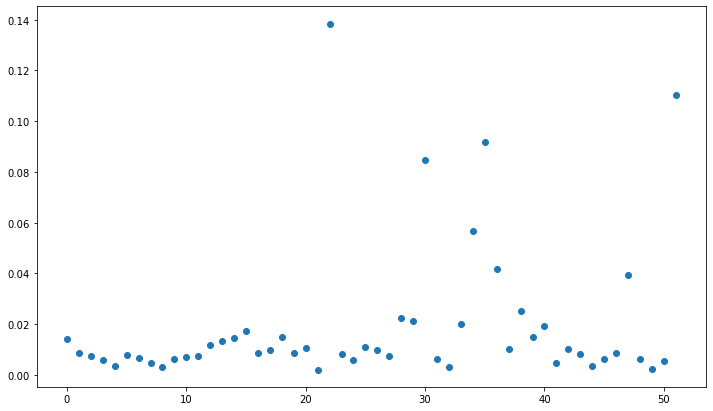

In [202]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
plt.show()

In [203]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

A continuación graficamos la serie original comparada con la correspondiente a la serie predicha

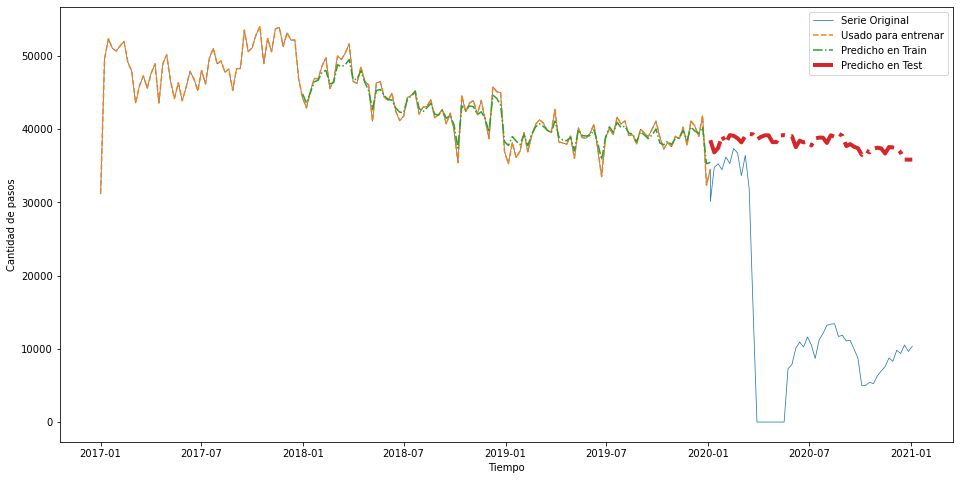

In [204]:
plt.figure(figsize=(16,8))
plt.plot(senial_st.index[:length_total], senial_st[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_st.index[:N_train + look_back_s], senial_st[:N_train + look_back_s],'--', label = 'Usado para entrenar')
plt.plot(senial_st.index[look_back_s: look_back_s + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial_st.index[N_train+look_back_s: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [205]:
semanal_2020["Forecast_RFS_2020"] = y_test_pred

In [206]:
#Realizamos el cálculo de los errores
rmse_rfs_2020 = np.sqrt(mean_squared_error(semanal_2020.cantidad_pasos, semanal_2020.Forecast_RFS_2020))
mae_rfs_2020 =  mean_absolute_error(semanal_2020.cantidad_pasos, semanal_2020.Forecast_RFS_2020)
mape_rfs_2020 = np.mean(np.abs((semanal_2020.cantidad_pasos - semanal_2020.Forecast_RFS_2020) / semanal_2020.cantidad_pasos)) * 100

In [207]:
print("RMSE de modelo Random Forest semanal:", rmse_rfs_2020) #presentamos el RMSE del modelo Random Forest semanal
print("\nMAE de modelo Random Forest semanal:", mae_rfs_2020) #presentamos el MAE del modelo Random Forest semanal
print("\nMAPE de modelo Random Forest semanal:", mape_rfs_2020) #presentamos el MAPE del modelo Random Forest semanal

RMSE de modelo Random Forest semanal: 27246.54418531815

MAE de modelo Random Forest semanal: 24688.705619946093

MAPE de modelo Random Forest semanal: inf


Se observa que el modelo no se ajusta a la realidad del año 2020, si bien copia las tendencias del período de entrenamiento en forma general.  Adicionalmente debido a la situación sanitaria, a partir de fines del primer trimestre del año 2020 se observó una drástica caida en la cantidad de pasos de pago efectivo, con días de movimientos nulos por un período considerable y luego con valores por debajo del comportamiento normal esperado.  

Por este motivo, los errores presentan valores elevados, y el MAPE termina siendo indeterminado.

En las conclusiones se ampliarán algunos comentarios al respecto.

## Agregado de datos históricos

Agregaremos datos de años anteriores con el objetivo de evaluar si el entrenamiento del modelo con más datos brinda un mejor resultado.  Realizaremos esta comparación tanto para modelos semanales como diarios.

In [208]:
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')
data_2015 = pd.read_csv('flujo-vehicular-2015.csv', sep =',')
data_2014 = pd.read_csv('flujo-vehicular-2014.csv', sep =',')

In [209]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
1     2016  2016-01-01            0         1  Viernes  Alberdi  Centro   
2     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
3     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   
4     2016  2016-01-01            1         2  Viernes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              32  
1       Liviano      AUPASS               9  
2       Liviano  NO COBRADO               1  
3       Liviano    EFECTIVO               4  
4       Liviano      EXENTO               3

In [210]:
data_2015.info()
data_2015.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017958 entries, 0 to 1017957
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1017958 non-null  int64 
 1   fecha           1017958 non-null  object
 2   hora            1017958 non-null  int64 
 3   dia             1017958 non-null  object
 4   estacion        1017958 non-null  object
 5   tipo_vehiculo   1017958 non-null  object
 6   forma_pago      1017958 non-null  object
 7   cantidad_pasos  1017958 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 62.1+ MB


periodo       fecha  hora     dia estacion tipo_vehiculo  forma_pago  \
0     2015  2015-01-01     0  Jueves  Alberdi       Liviano  NO COBRADO   
1     2015  2015-01-01     0  Jueves  Alberdi       Liviano    EFECTIVO   
2     2015  2015-01-01     0  Jueves  Alberdi       Liviano      EXENTO   
3     2015  2015-01-01     0  Jueves  Alberdi       Liviano    EFECTIVO   
4     2015  2015-01-01     0  Jueves  Alberdi       Liviano      AUPASS   

   cantidad_pasos  
0              15  
1               1  
2               1  
3              68  
4              18

In [211]:
data_2014.info()
data_2014.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809376 entries, 0 to 809375
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   periodo         809374 non-null  float64
 1   fecha           809374 non-null  object 
 2   hora            809374 non-null  float64
 3   dia             809374 non-null  object 
 4   estacion        809374 non-null  object 
 5   tipo_vehiculo   809374 non-null  object 
 6   forma_pago      809374 non-null  object 
 7   cantidad_pasos  809375 non-null  float64
dtypes: float64(3), object(5)
memory usage: 49.4+ MB


periodo       fecha  hora        dia estacion tipo_vehiculo  forma_pago  \
0   2014.0  2014-01-01   0.0  Miercoles  Alberdi       Liviano  NO COBRADO   
1   2014.0  2014-01-01   0.0  Miercoles  Alberdi       Liviano    EFECTIVO   
2   2014.0  2014-01-01   0.0  Miercoles  Alberdi       Liviano  NO COBRADO   
3   2014.0  2014-01-01   0.0  Miercoles  Alberdi       Liviano    EFECTIVO   
4   2014.0  2014-01-01   0.0  Miercoles  Alberdi       Liviano      AUPASS   

   cantidad_pasos  
0            26.0  
1             2.0  
2             1.0  
3            64.0  
4            17.0

Se observa que no coinciden las columnas entre estos años y en comparación a los años posteriores.

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [212]:
print(data_2016['estacion'].unique())
print(data_2015['estacion'].unique())
print(data_2014['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 'Dellepiane Centro' 'Salguero']
['Alberdi' 'Avellaneda' 'Dellepiane Liniers' 'Illia' 'Retiro' 'Sarmiento'
 nan]


In [213]:
print(data_2016['forma_pago'].unique())
print(data_2015['forma_pago'].unique())
print(data_2014['forma_pago'].unique())

['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['NO COBRADO' 'EFECTIVO' 'EXENTO' 'AUPASS' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']
['NO COBRADO' 'EFECTIVO' 'AUPASS' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO' nan]


In [214]:
data_2016['fecha2'] = pd.to_datetime(data_2016.fecha) + pd.to_timedelta(data_2016.hora_fin, unit = 'h')
data_2016

periodo       fecha  hora_inicio  hora_fin      dia   estacion  \
0           2016  2016-01-01            0         1  Viernes    Alberdi   
1           2016  2016-01-01            0         1  Viernes    Alberdi   
2           2016  2016-01-01            1         2  Viernes    Alberdi   
3           2016  2016-01-01            1         2  Viernes    Alberdi   
4           2016  2016-01-01            1         2  Viernes    Alberdi   
...          ...         ...          ...       ...      ...        ...   
1379438     2016  2016-12-31           21        22   Sábado  Sarmiento   
1379439     2016  2016-12-31           22        23   Sábado  Sarmiento   
1379440     2016  2016-12-31           22        23   Sábado  Sarmiento   
1379441     2016  2016-12-31           23         0   Sábado  Sarmiento   
1379442     2016  2016-12-31           23         0   Sábado  Sarmiento   

           sentido tipo_vehiculo  forma_pago  cantidad_pasos  \
0           Centro       Liviano  NO COBRADO              32   
1           Centro       Liviano      AUPASS               9   
2           Centro       Liviano  NO COBRADO               1   
3           Centro       Liviano    EFECTIVO               4   
4           Centro       Liviano      EXENTO               3   
...            ...           ...         ...             ...   
1379438  Provincia       Liviano      AUPASS              77   
1379439  Provincia       Liviano  NO COBRADO               2   
1379440  Provincia       Liviano      AUPASS               6   
1379441  Provincia       Liviano  NO COBRADO               1   
1379442  Provincia       Liviano      AUPASS               3   

                     fecha2  
0       2016-01-01 01:00:00  
1       2016-01-01 01:00:00  
2       2016-01-01 02:00:00  
3       2016-01-01 02:00:00  
4       2016-01-01 02:00:00  
...                     ...  
1379438 2016-12-31 22:00:00  
1379439 2016-12-31 23:00:00  
1379440 2016-12-31 23:00:00  
1379441 2016-12-31 00:00:00  
1379442 2016-12-31 00:00:00  

[1379443 rows x 11 columns]

Dado que no coinciden las columnas entre las diferentes bases, procederemos a seleccionar solo aquellas columnas que utilizaremos para trabajar.

In [215]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2015['fecha2'] = pd.to_datetime(data_2015.fecha) + pd.to_timedelta(data_2015.hora, unit = 'h')
data_2015

periodo       fecha  hora     dia   estacion tipo_vehiculo  \
0           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
1           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
2           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
3           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
4           2015  2015-01-01     0  Jueves    Alberdi       Liviano   
...          ...         ...   ...     ...        ...           ...   
1017953     2015  2015-12-31    21  Jueves  Sarmiento       Liviano   
1017954     2015  2015-12-31    21  Jueves  Sarmiento       Liviano   
1017955     2015  2015-12-31    22  Jueves  Sarmiento       Liviano   
1017956     2015  2015-12-31    22  Jueves  Sarmiento       Liviano   
1017957     2015  2015-12-31    23  Jueves  Sarmiento       Liviano   

         forma_pago  cantidad_pasos              fecha2  
0        NO COBRADO              15 2015-01-01 00:00:00  
1          EFECTIVO               1 2015-01-01 00:00:00  
2            EXENTO               1 2015-01-01 00:00:00  
3          EFECTIVO              68 2015-01-01 00:00:00  
4            AUPASS              18 2015-01-01 00:00:00  
...             ...             ...                 ...  
1017953      AUPASS               1 2015-12-31 21:00:00  
1017954      AUPASS             121 2015-12-31 21:00:00  
1017955  NO COBRADO               5 2015-12-31 22:00:00  
1017956      AUPASS              19 2015-12-31 22:00:00  
1017957      AUPASS               4 2015-12-31 23:00:00  

[1017958 rows x 9 columns]

In [216]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2014['fecha2'] = pd.to_datetime(data_2014.fecha) + pd.to_timedelta(data_2014.hora, unit = 'h')
data_2014

periodo       fecha  hora        dia   estacion tipo_vehiculo  \
0        2014.0  2014-01-01   0.0  Miercoles    Alberdi       Liviano   
1        2014.0  2014-01-01   0.0  Miercoles    Alberdi       Liviano   
2        2014.0  2014-01-01   0.0  Miercoles    Alberdi       Liviano   
3        2014.0  2014-01-01   0.0  Miercoles    Alberdi       Liviano   
4        2014.0  2014-01-01   0.0  Miercoles    Alberdi       Liviano   
...         ...         ...   ...        ...        ...           ...   
809371   2014.0  2014-12-31  21.0  Miercoles  Sarmiento       Liviano   
809372   2014.0  2014-12-31  22.0  Miercoles  Sarmiento       Liviano   
809373   2014.0  2014-12-31  22.0  Miercoles  Sarmiento       Liviano   
809374   2014.0  2014-12-31  23.0  Miercoles  Sarmiento       Liviano   
809375   2014.0  2014-12-31  23.0  Miercoles  Sarmiento       Liviano   

        forma_pago  cantidad_pasos              fecha2  
0       NO COBRADO            26.0 2014-01-01 00:00:00  
1         EFECTIVO             2.0 2014-01-01 00:00:00  
2       NO COBRADO             1.0 2014-01-01 00:00:00  
3         EFECTIVO            64.0 2014-01-01 00:00:00  
4           AUPASS            17.0 2014-01-01 00:00:00  
...            ...             ...                 ...  
809371      AUPASS            82.0 2014-12-31 21:00:00  
809372  NO COBRADO             5.0 2014-12-31 22:00:00  
809373      AUPASS             5.0 2014-12-31 22:00:00  
809374  NO COBRADO             2.0 2014-12-31 23:00:00  
809375      AUPASS             3.0 2014-12-31 23:00:00  

[809376 rows x 9 columns]

In [217]:
data_2016 = data_2016[['fecha2','estacion','forma_pago','cantidad_pasos']]
data_2015 = data_2015[['fecha2','estacion','forma_pago','cantidad_pasos']]
data_2014 = data_2014[['fecha2','estacion','forma_pago','cantidad_pasos']]

In [218]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_previa = pd.concat([data_2016, data_2015, data_2014])

In [219]:
dataset_previa = dataset_previa[(dataset_previa.estacion == 'Illia')&(dataset_previa.forma_pago == 'EFECTIVO')]

In [220]:
diario_p = dataset_previa.resample('D', on = 'fecha2').sum()

In [221]:
diario_total = pd.concat([diario_p, diario])

In [222]:
diario_total.info

<bound method DataFrame.info of             cantidad_pasos
2014-01-01          7979.0
2014-01-02         18024.0
2014-01-03         35995.0
2014-01-04             1.0
2014-01-05             1.0
...                    ...
2019-12-27         40182.0
2019-12-28         30681.0
2019-12-29         26259.0
2019-12-30         34523.0
2019-12-31         34523.0

[2191 rows x 1 columns]>

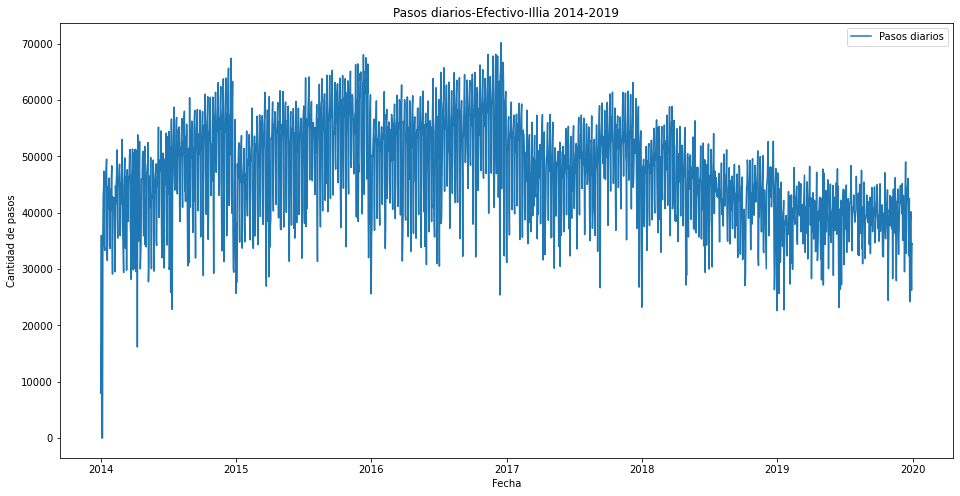

In [223]:
plt.figure(figsize=(16,8))
plt.plot(diario_total.index, diario_total.cantidad_pasos, label = 'Pasos diarios')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Pasos diarios-Efectivo-Illia 2014-2019')
plt.show()

Probaremos los modelos ARIMA (que originalmente no funcionaron bien) con el set de datos ampliado para analizar si el mayor volumen de datos mejora el ajuste y desempeño.
Probaremos tanto modelo diario cómo semanal.  Para ello seguiremos estos pasos:
1. Eliminaremos los outliers que se puedan haber agregado del nuevo set de datos
1. Analizaremos el modelo diario
1. Analizaremos el modelo semanal
1. Compararemos resultados

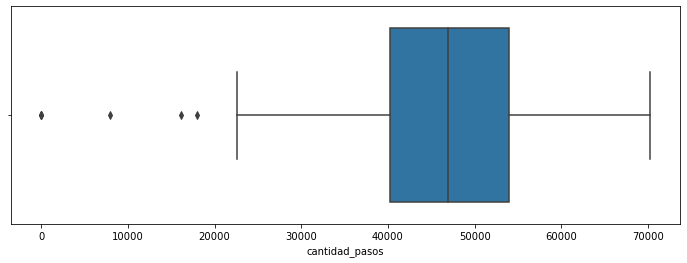

In [224]:
#graficamos un boxplot de los pasos diarios
plt.figure(figsize = (12,4))
sns.boxplot(x=diario_total.cantidad_pasos)
plt.show()

In [225]:
#eliminamos los registros menores a 20.000 pasos diarios
diario_total.cantidad_pasos[diario_total.cantidad_pasos < 22000] = np.nan

In [226]:
diario_total.isna().sum()

cantidad_pasos    6
dtype: int64

In [227]:
#interpolamos para completar los N/A generados en la eliminación de outliers
diario_total = diario_total.interpolate()

In [228]:
diario_total.isna().sum()

cantidad_pasos    2
dtype: int64

In [229]:
diario_total.head(3)

cantidad_pasos
2014-01-01             NaN
2014-01-02             NaN
2014-01-03         35995.0

In [230]:
# completaremos los datos nulos con el primer valor de la serie
diario_total.loc['2014-01-01'].cantidad_pasos = 35995
diario_total.loc['2014-01-02'].cantidad_pasos = 35995

In [231]:
diario_total.head(3)

cantidad_pasos
2014-01-01         35995.0
2014-01-02         35995.0
2014-01-03         35995.0

In [232]:
#Utilizaremos el dato promedio semana realizando un resample sobre el dataset diario.
semanal_t= diario_total.resample("W").mean()

In [233]:
#Creamos los nuevos dataset de train
diario_train_t = diario_total[diario_total.index<= max_train] #se toman los mismos límites originalmente planteados
semanal_train_t = semanal_t[semanal_t.index<= max_train]

In [234]:
#modelo manual diario
model_mdt = ARIMA(diario_train_t, order=(5,1,5))
model_mdt_fit = model_mdt.fit()
print(model_mdt_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         cantidad_pasos   No. Observations:                 2099
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -21053.785
Date:                Tue, 05 Oct 2021   AIC                          42129.571
Time:                        22:37:23   BIC                          42191.707
Sample:                    01-01-2014   HQIC                         42152.331
                         - 09-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9494      0.037     25.955      0.000       0.878       1.021
ar.L2         -1.5626      0.029    -54.802      0.000      -1.619      -1.507
ar.L3          1.0293      0.050     20.709      0.0

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


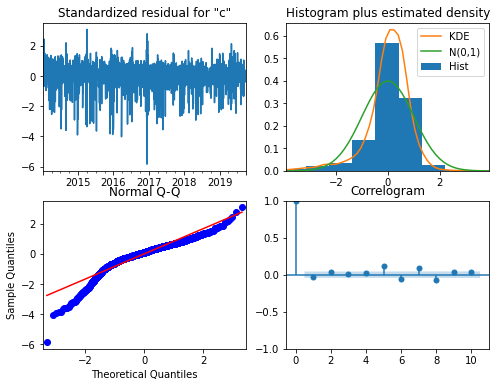

In [235]:
model_mdt_fit.plot_diagnostics(figsize=(8, 6))
plt.show()

In [236]:
#realizaremos la predicción
forecast = model_mdt_fit.forecast(steps=len(diario_test))
diario_test["Forecast_MDT"] = forecast

<ipython-input-236-9574da4b37c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario_test["Forecast_MDT"] = forecast


In [237]:
#Realizamos el cálculo de los errores
rmse_MDT = np.sqrt(mean_squared_error(diario_test.cantidad_pasos, diario_test.Forecast_MDT))
mae_MDT =  mean_absolute_error(diario_test.cantidad_pasos, diario_test.Forecast_MDT)
mape_MDT = np.mean(np.abs((diario_test.cantidad_pasos - diario_test.Forecast_MDT) / diario_test.cantidad_pasos)) * 100

In [238]:
print("RMSE de modelo diario:", rmse_MDT) #presentamos el RMSE del modelo manual diario
print("\nMAE de modelo diario:", mae_MDT) #presentamos el MAE del modelo manual diario
print("\nMAPE de modelo diario:", mape_MDT) #presentamos el MAPE del modelo manual diario

RMSE de modelo diario: 5041.576728552585

MAE de modelo diario: 3696.5190001248075

MAPE de modelo diario: 10.916262554176246


In [239]:
resultados = resultados.append(pd.DataFrame({'Modelo':['ARIMA MDT'], 'RMSE':[rmse_MDT], 'MAE':[mae_MDT], 'MAPE':[mape_MDT], 'MAPE vs Benchmark':[(mape_MDT - resultados.MAPE[0])]}), ignore_index=True)

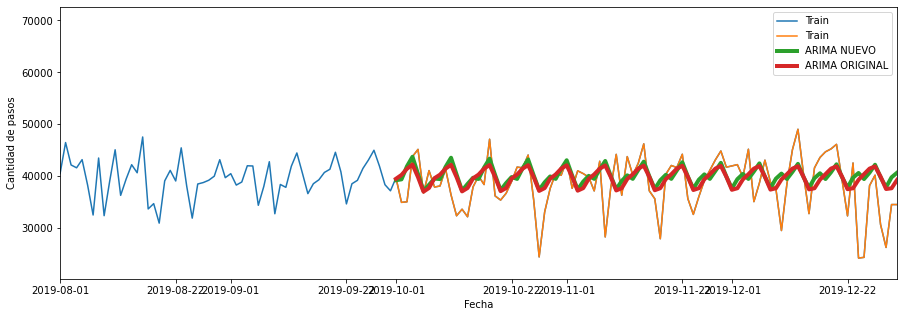

In [240]:
plt.figure(figsize = (15,5))
plt.plot(diario_total.index, diario_total.cantidad_pasos, label = 'Train')
plt.plot(diario_test.index, diario_test.cantidad_pasos, label = 'Train')
plt.plot(diario_test.index, diario_test.Forecast_MDT , lw = 4, label = 'ARIMA NUEVO')
plt.plot(diario_test.index, diario_test.Forecast_MD , lw = 4, label = 'ARIMA ORIGINAL')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.axis(xmin='2019-08-01', xmax='2019-12-31')
plt.legend()
plt.show()

In [241]:
resultados

Modelo         RMSE          MAE       MAPE MAPE vs Benchmark
0   Benchmark_LR  5323.062542  4292.709168  11.687855               NaN
1       ARIMA MD  4893.085914  3606.516305  10.562437          -1.12542
2       ARIMA MS  3409.352485  2653.638495   7.246964          -4.44089
3    AUTOARIMA-D  4893.085914  3606.516305  10.562437          -1.12542
4    AUTOARIMA-S  3420.483897  2666.073488   7.279765          -4.40809
5      SARIMA-MD  5270.640192  3763.190189  11.303601         -0.384254
6      SARIMA MS  4818.928419  4065.492873  10.915103         -0.772751
7           RF-D  4555.531268  3334.741929   9.690736          -1.99712
8           RF-S  2284.620868  1626.766099   4.441716          -7.24614
9          XGB-S  3048.579255  2038.669171   5.437766          -6.25009
10     ARIMA MDT  5041.576729  3696.519000  10.916263         -0.771592

Se observa un componente adicional en la curva, si bien esto no se traduce en los resultados de las métricas

In [242]:
# modelo manual semanal
model_mst = ARIMA(semanal_train_t, order=(1,1,1))
model_mst_fit = model_mst.fit()
print(model_mst_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         cantidad_pasos   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2812.455
Date:                Tue, 05 Oct 2021   AIC                           5630.909
Time:                        22:37:24   BIC                           5642.011
Sample:                    01-05-2014   HQIC                          5635.352
                         - 09-29-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3230      0.070      4.585      0.000       0.185       0.461
ma.L1         -0.6670      0.073     -9.107      0.000      -0.811      -0.523
sigma2      7.599e+06   4.09e+05     18.589      0.0

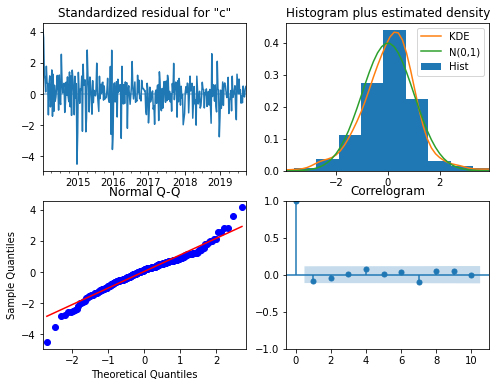

In [243]:
model_mst_fit.plot_diagnostics(figsize=(8, 6))
plt.show()

In [244]:
#realizaremos la predicción
forecast = model_mst_fit.forecast(steps=len(semanal_test))
semanal_test["Forecast_MST"] = forecast

<ipython-input-244-ccfa363496b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semanal_test["Forecast_MST"] = forecast


In [245]:
#Realizamos el cálculo de los errores
rmse_mst = np.sqrt(mean_squared_error(semanal_test.cantidad_pasos, semanal_test.Forecast_MST))
mae_mst =  mean_absolute_error(semanal_test.cantidad_pasos, semanal_test.Forecast_MST)
mape_mst = np.mean(np.abs((semanal_test.cantidad_pasos - semanal_test.Forecast_MST) / semanal_test.cantidad_pasos)) * 100

In [246]:
print("RMSE de modelo semanal:", rmse_mst) #presentamos el RMSE del modelo manual semanal
print("\nMAE de modelo semanal:", mae_mst) #presentamos el MAE del modelo manual semanal
print("\nMAPE de modelo semanal:", mape_mst) #presentamos el MAPE del modelo manual semanal

RMSE de modelo semanal: 2809.481961288055

MAE de modelo semanal: 2059.844407973978

MAPE de modelo semanal: 5.6509084599602035


In [247]:
resultados = resultados.append(pd.DataFrame({'Modelo':['ARIMA MST'], 'RMSE':[rmse_mst], 'MAE':[mae_mst], 'MAPE':[mape_mst], 'MAPE vs Benchmark':[(mape_mst - resultados.MAPE[0])]}), ignore_index=True)

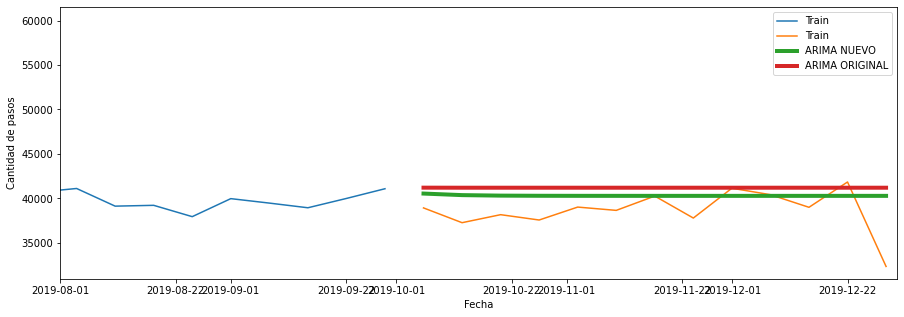

In [248]:
plt.figure(figsize = (15,5))
plt.plot(semanal_train_t.index, semanal_train_t.cantidad_pasos, label = 'Train')
plt.plot(semanal_test.index, semanal_test.cantidad_pasos, label = 'Train')
plt.plot(semanal_test.index, semanal_test.Forecast_MST , lw = 4, label = 'ARIMA NUEVO')
plt.plot(semanal_test.index, semanal_test.Forecast_MS , lw = 4, label = 'ARIMA ORIGINAL')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.axis(xmin='2019-08-01', xmax='2019-12-31')
plt.legend()
plt.show()

En el caso del modelo semanal se observa una mejoría en las métricas, aunque el modelo no logra copiar el comportamiento de la serie en su evolución semanal, sino que se presenta como una aproximación lineal.

In [250]:
resultados.set_index('Modelo', inplace=True)
resultados

RMSE          MAE       MAPE MAPE vs Benchmark
Modelo                                                             
Benchmark_LR  5323.062542  4292.709168  11.687855               NaN
ARIMA MD      4893.085914  3606.516305  10.562437          -1.12542
ARIMA MS      3409.352485  2653.638495   7.246964          -4.44089
AUTOARIMA-D   4893.085914  3606.516305  10.562437          -1.12542
AUTOARIMA-S   3420.483897  2666.073488   7.279765          -4.40809
SARIMA-MD     5270.640192  3763.190189  11.303601         -0.384254
SARIMA MS     4818.928419  4065.492873  10.915103         -0.772751
RF-D          4555.531268  3334.741929   9.690736          -1.99712
RF-S          2284.620868  1626.766099   4.441716          -7.24614
XGB-S         3048.579255  2038.669171   5.437766          -6.25009
ARIMA MDT     5041.576729  3696.519000  10.916263         -0.771592
ARIMA MST     2809.481961  2059.844408   5.650908          -6.03695

# Cierre y Conclusiones

El análisis exploratorio combinado con un estudio de contexto y caso real resulta fundamental para interpretar los comportamientos de la serie de tiempo y no llegar a conclusiones erradas.  La serie de tiempo utilizada en el presente trabajo nos presenta una porción del problema, mostrando un comportamiento para una forma de pago que, si no se tiene en cuenta este recorte, puede interpretarse erróneamente el problema en cuestión. 

A su vez, el comportamiento de los datos para los filtros aplicados (Peaje Illia y pago en efectivo) presenta una gran dispersión, y los modelos utilizados no alcanzan buenos indicadores de precisión.  

## Ampliación de la base de entrenamiento.
Al agregar datos históricos se observa una leve mejoría en el modelo semanal, mientras que en el modelo diario el comportamiento empeora.  En este último caso esto puede relacionarse a que los años agregados (2014 a 2016) presentan una mayor dispersión en comparación a los años ya existentes (2017 a 2019).

## Estimación año 2020
Por otro lado, en lo que respecta al año 2020, el mismo presenta un comportamiento totalmente atípico, en especial para la modalidad de pago en efectivo.  Debido al coronavirus se extremaron los cuidados fomentando el pago por medios automáticos (AUpass) y reduciendo drásticamente la modalidad de pago en efectivo.  Durante un período entre los meses de marzo y abril, el pago en efectivo fue directamente suspendido para luego regresar en valores notablemente inferiores. 
Los modelos entrenados con los años anteriores, tanto diario ARIMA como semanal Random Forest no tuvieron la capacidad de predecir dicho comportamiento, lo cual es esperable por presentar una naturaleza notablemente diferente a los datos de entrenamiento.

## Próximos pasos
A partir del trabajo realizado, se considera la posibilidad de transitar los siguientes caminos con el objetivo de mejorar los modelos utilizados y de incorporar nuevas herramientas para alcanzar predicciones más precisas:
1. **Incorporación de los otros medios de pago para analizar el comportamiento del tránsito vehicular de forma completa a través de la autopista indicada.**  Como se mencionó anteriormente, el pago en efectivo representa solo una porción de los datos con un comportamiento particular.  Esto *no permite entender el comportamiento del todo*, y genera distorsiones en parte de las variables.  La incorporación de todos los medios de pago permitirá trabajar sobre el flujo de vehículos completo, el cual presentará un comporamiento más homogeneo como se observó en el análisis exploratorio.  A modo de ejemplo, los días en los cuales no se cobra peaje se observa una disminución de la cantidad de pasos todos los medios de pago y un aumento en pases "no cobrado", mientras que el comportamiento total se mantendrá estable. Por otro lado, el pago en efectivo y medios automáticos presentan un comportamiento más estable debido a que entre ellos existe una migración paulatina de uno a otro que se va compensando en el total. 
1. **Incorporación de variables exógenas.**  Durante el análisis se observó que el comportamiento del tráfico responde a ciertas situaciones que no están representadas en la propia variable, en un ciclo o estacionalidad, y que podrían ser asociadas a variables exógenas.  Por ejemplo, en los días no laborables (feriados) se observa una disminución considerable en la cantidad de pasos y estos no son necesariamente estacionales ya que varían de año a año según cómo se desarrollan las semanas.  Así mismo, los días festivos o en épocas vacacionales también se observa un comportamiento diferente.  Por otro lado, incluir el tipo de vehículo y el sentido podría ser una alternativa que provea información adicional.
1. **Utilización de modelos más avanzados.**  Se pretende utilizar la herramienta Prophet de *Facebook* y experimentar su capacidad de aprendizaje y predicción.  Dicha herramienta desarrollada por Facebook se caracteriza por su capacidad de predicción avanzada y simplicidad en su uso, lo que la convierte en una herramienta potente de fácil acceso. 
1. **Utilización de redes neuronales.**  Probar el desempeño de modelos que incorporen redes neuronales y compararlo con los modelos mencionados anteriormente.  Las redes neuronales se configuran a partir de grandes cantidades de datos para identificar y comprender determinados patrones de comportamiento, devolviendo un resultado en línea con el aprendizaje realizado.  Es utilizado en diferentes ámbitos siendo el procesamiento de imágenes el más conocido o renombrado, y puede ser utilizado en series temporales.  Dentro de series temporales es utilizado en reconocimiento de frecuencias de voz o sonidos, nuevamente a partir de patrones.  Resulta interesante probar su funcionamiento y desempeño, ya que las redes neuronales no necesariamente se valen de la cronología para el reconocimiento de dichos patrones, sino que su lógica de procesamiento puede estar asociada a otros esquemas que no estemos contemplando a priori.

# -------------Fin del proyecto------------------------------------